<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio Clustering


### Contexto del Problema

Eres un científico de datos contratado por una federación deportiva internacional que desea mejorar sus programas de entrenamiento personalizados. La federación maneja una gran variedad de atletas que participan en diferentes disciplinas deportivas, y cada uno tiene necesidades de entrenamiento y desarrollo únicas. Para maximizar el rendimiento y mejorar la efectividad de los programas de entrenamiento, la federación quiere segmentar a sus atletas en grupos homogéneos basados en sus características físicas, habilidades y comportamientos de entrenamiento.


### Los datos

- **name**: Nombre del atleta. Es una variable categórica que identifica a cada atleta de manera única.

- **gender**: Género del atleta. Es una variable categórica que indica si el atleta es masculino ("Male") o femenino ("Female").

- **age**: Edad del atleta. Es una variable numérica que representa la edad del atleta en años.

- **height**: Altura del atleta. Es una variable numérica que representa la altura del atleta en centímetros.

- **nationality**: Nacionalidad del atleta. Es una variable categórica que indica el país de origen del atleta.

- **weight**: Peso del atleta. Es una variable numérica que representa el peso del atleta en kilogramos.

- **sports**: Deportes que practica el atleta. Es una variable categórica que puede contener múltiples valores (deportes) separados por comas.

- **hours_per_day**: Horas de entrenamiento por día. Es una variable numérica que indica el número promedio de horas que el atleta entrena cada día.

- **strength**: Fuerza del atleta. Es una variable numérica que representa la evaluación de la fuerza del atleta en una escala (por ejemplo, de 1 a 10).

- **agility**: Agilidad del atleta. Es una variable numérica que representa la evaluación de la agilidad del atleta en una escala (por ejemplo, de 1 a 10).

- **mental**: Capacidad mental del atleta. Es una variable numérica que representa la evaluación de la capacidad mental del atleta en una escala (por ejemplo, de 1 a 10).

- **federation**: Federación a la que pertenece el atleta. Es una variable categórica que indica la organización deportiva a la que está afiliado el atleta.

- **year_start**: Año de inicio. Es una variable numérica que indica el año en que el atleta comenzó su carrera o se unió a la federación.

- **rank**: Rango del atleta. Es una variable numérica que representa la posición o clasificación del atleta en su disciplina o federación.


### Objetivo del Ejercicio

El objetivo principal de este ejercicio es que los alumnos practiquen y desarrollen habilidades en el análisis de datos, preprocesamiento y técnicas de clustering aplicadas a un problema real en el ámbito deportivo. Al completar este ejercicio, los alumnos deberán ser capaces de:

1. **Realizar un Análisis Exploratorio de Datos (EDA)**:
    - Comprender la estructura y distribución de los datos.
    - Identificar patrones y relaciones significativas entre las variables.
    - Manejar valores faltantes y atípicos de manera efectiva.
    - Visualizar las características más relevantes.

2. **Preprocesar los Datos de Manera Adecuada**:
    - Convertir variables categóricas en variables numéricas.
    - Escalar las variables numéricas para asegurar una contribución equitativa al análisis de clustering.
    - Seleccionar las características más relevantes que contribuirán al análisis de clustering.

3. **Aplicar Técnicas de Clustering para Segmentar a los Atletas**:
    - Probar diferentes métodos de clustering (e.g., K-means, DBSCAN, Hierarchical Clustering) para identificar el más adecuado para los datos proporcionados.
    - Determinar el número óptimo de clusters utilizando métodos como el codo (Elbow Method) o la silueta (Silhouette Score).
    - Visualizar los clusters obtenidos y analizar sus características distintivas.

4. **Extraer Conclusiones y Proporcionar Recomendaciones de Entrenamiento**:
    - Describir las características principales de cada cluster identificado.
    - Proporcionar recomendaciones prácticas y accionables para personalizar los programas de entrenamiento para cada grupo de atletas.
¡

In [40]:
# Para no tener que reiniciar el kernel
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

import math

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly  as px


# Para el modelado de los datos
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Preprocesado y modelado
# -----------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler


# Sacar número de clusters y métricas
# -----------------------------------------------------------------------
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# Modelos de clustering
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

# Para visualizar los dendrogramas
# -----------------------------------------------------------------------
import scipy.cluster.hierarchy as sch
# Configuración warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
import sys
import os
sys.path.append(os.path.abspath('../'))

In [1]:
# Insertamos los soportes de nuestro src

from src import soporte_clustering as sc
from src import soporte_outliers as so

ImportError: cannot import name 'soporte_outliers' from 'src' (unknown location)

In [43]:
# Instrucción para visualizar todas las columnas de un dataFrame
pd.set_option('display.max_columns', None)

In [44]:
df = pd.read_csv('datos/WrestlingWorldTournament.csv',index_col=0)

In [45]:
df.head() 

name  gender  age  height nationality  weight       sports  \
0         Aaron Peavy  Female   41   165.0     England      82  Boxing, MMA   
1         Abe Rutland    Male   36   185.0       Japan     100         Judo   
2        Adrian Quinn    Male   29   178.5       Japan      93       Karate   
3        Alan Beckham    Male   39   187.5       Japan     107         Judo   
4  Albertha Rodriguez  Female   29   158.0         USA      72          MMA   

   hours_per_day  strength  agility  mental                     federation  \
0              3         7        8       7           Fight Zone Wrestling   
1              0         8        5       9  World Wrestling Entertainment   
2              4         8        8       7  World Wrestling Entertainment   
3              3         7        6       8           Fight Zone Wrestling   
4              1         5        7       7  Consejo Global de Lucha Libre   

   year_start  rank  
0        1989    42  
1        2006   161  
2        2012   153  
3        2003   252  
4        2012   360

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           500 non-null    object 
 1   gender         500 non-null    object 
 2   age            500 non-null    int64  
 3   height         500 non-null    float64
 4   nationality    500 non-null    object 
 5   weight         500 non-null    int64  
 6   sports         500 non-null    object 
 7   hours_per_day  500 non-null    int64  
 8   strength       500 non-null    int64  
 9   agility        500 non-null    int64  
 10  mental         500 non-null    int64  
 11  federation     500 non-null    object 
 12  year_start     500 non-null    int64  
 13  rank           500 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 58.6+ KB


In [47]:
# instanciamos la clase de Exploración de datos antes de aplicar el algoritmo
preprocesar = sc.Exploracion(df)

# llamamos al método de exploración de datos
preprocesar.explorar_datos()

5 registros aleatorios:


name  gender  age  height nationality  weight  \
396     Rita Lustig  Female   24   167.5         USA      80   
182  Glenda Sherman  Female   24   172.0      France      84   
365     Paul Grubbs    Male   35   180.5       Japan     100   
416        Rosa Joy  Female   28   173.5         USA      87   
492  William Bryant    Male   31   180.0         USA      97   

                  sports  hours_per_day  strength  agility  mental  \
396         Boxing, Judo              3         6        7       6   
182            Judo, MMA              2         6        8       7   
365  Karate, Kick-Boxing              4         8        8       9   
416       Boxing, Karate              3         6        8       8   
492  Boxing, Karate, MMA              4         6        6       9   

                        federation  year_start  rank  
396           Fight Zone Wrestling        2009   423  
182           Fight Zone Wrestling        2021   229  
365  Consejo Global de Lucha Libre        2004    67  
416  Consejo Global de Lucha Libre        2009   293  
492  Consejo Global de Lucha Libre        2006    97



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           500 non-null    object 
 1   gender         500 non-null    object 
 2   age            500 non-null    int64  
 3   height         500 non-null    float64
 4   nationality    500 non-null    object 
 5   weight         500 non-null    int64  
 6   sports         500 non-null    object 
 7   hours_per_day  500 non-null    int64  
 8   strength       500 non-null    int64  
 9   agility        500 non-null    int64  
 10  mental         500 non-null    int64  
 11  federation     500 non-null    object 
 12  year_start     500 non-null    int64  
 13  rank           500 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 58.6+ KB
None


Duplicados en el DataFrame:
0


Estadísticas descriptivas de las columnas numéricas:


count      mean         std     min      25%     50%       75%  \
age            500.0    31.154    5.438514    18.0    27.00    31.0    35.000   
height         500.0   174.864    9.468623   152.0   167.50   174.0   181.625   
weight         500.0    89.688   11.081889    65.0    81.00    89.0    98.000   
hours_per_day  500.0     3.064    1.375386     0.0     2.00     3.0     4.000   
strength       500.0     6.152    1.567741     2.0     5.00     6.0     7.000   
agility        500.0     7.148    1.455449     3.0     6.00     7.0     8.000   
mental         500.0     6.732    1.197934     3.0     6.00     7.0     8.000   
year_start     500.0  2007.130    6.325910  1986.0  2003.00  2007.0  2011.000   
rank           500.0   250.500  144.481833     1.0   125.75   250.5   375.250   

                  max  
age              53.0  
height          202.0  
weight          123.0  
hours_per_day     8.0  
strength         10.0  
agility          10.0  
mental           10.0  
year_start     2021.0  
rank            500.0



Estadísticas descriptivas de las columnas categóricas:


count unique                   top freq
name          500    500        Zenaida Flagge    1
gender        500      2                Female  265
nationality   500      8                France  118
sports        500     31                Karate   42
federation    500      3  Fight Zone Wrestling  206



Número de valores nulos por columna:
name             0
gender           0
age              0
height           0
nationality      0
weight           0
sports           0
hours_per_day    0
strength         0
agility          0
mental           0
federation       0
year_start       0
rank             0
dtype: int64


Distribución de valores categóricos:

Columna: name
name
Zenaida Flagge          1
Aaron Peavy             1
Abe Rutland             1
Adrian Quinn            1
Viola Lonergan          1
                       ..
Alfred Ray              1
Alexander Bracamonte    1
Alexander Boone         1
Alex Harris             1
Albertha Rodriguez      1
Name: count, Length: 500, dtype: int64

Columna: gender
gender
Female    265
Male      235
Name: count, dtype: int64

Columna: nationality
nationality
France       118
Japan        116
USA          115
Australia     64
Egypt         42
England       26
Argentina     12
India          7
Name: count, dtype: int64

Columna: sports
sports


age    height    weight  hours_per_day  strength  \
age            1.000000 -0.001694  0.044624      -0.003731  0.016052   
height        -0.001694  1.000000  0.982154       0.072840  0.658785   
weight         0.044624  0.982154  1.000000       0.071260  0.654799   
hours_per_day -0.003731  0.072840  0.071260       1.000000 -0.025897   
strength       0.016052  0.658785  0.654799      -0.025897  1.000000   
agility       -0.036051 -0.484157 -0.486668       0.326623 -0.384900   
mental         0.219514  0.144129  0.157628       0.275585  0.116703   
year_start    -0.858723  0.005482 -0.039413      -0.136393  0.017604   
rank          -0.208136 -0.251894 -0.257785      -0.458479 -0.383859   

                agility    mental  year_start      rank  
age           -0.036051  0.219514   -0.858723 -0.208136  
height        -0.484157  0.144129    0.005482 -0.251894  
weight        -0.486668  0.157628   -0.039413 -0.257785  
hours_per_day  0.326623  0.275585   -0.136393 -0.458479  
strength      -0.384900  0.116703    0.017604 -0.383859  
agility        1.000000 -0.005940   -0.054115 -0.343249  
mental        -0.005940  1.000000   -0.218854 -0.423994  
year_start    -0.054115 -0.218854    1.000000  0.323980  
rank          -0.343249 -0.423994    0.323980  1.000000

Visualizamos las variables numéricas

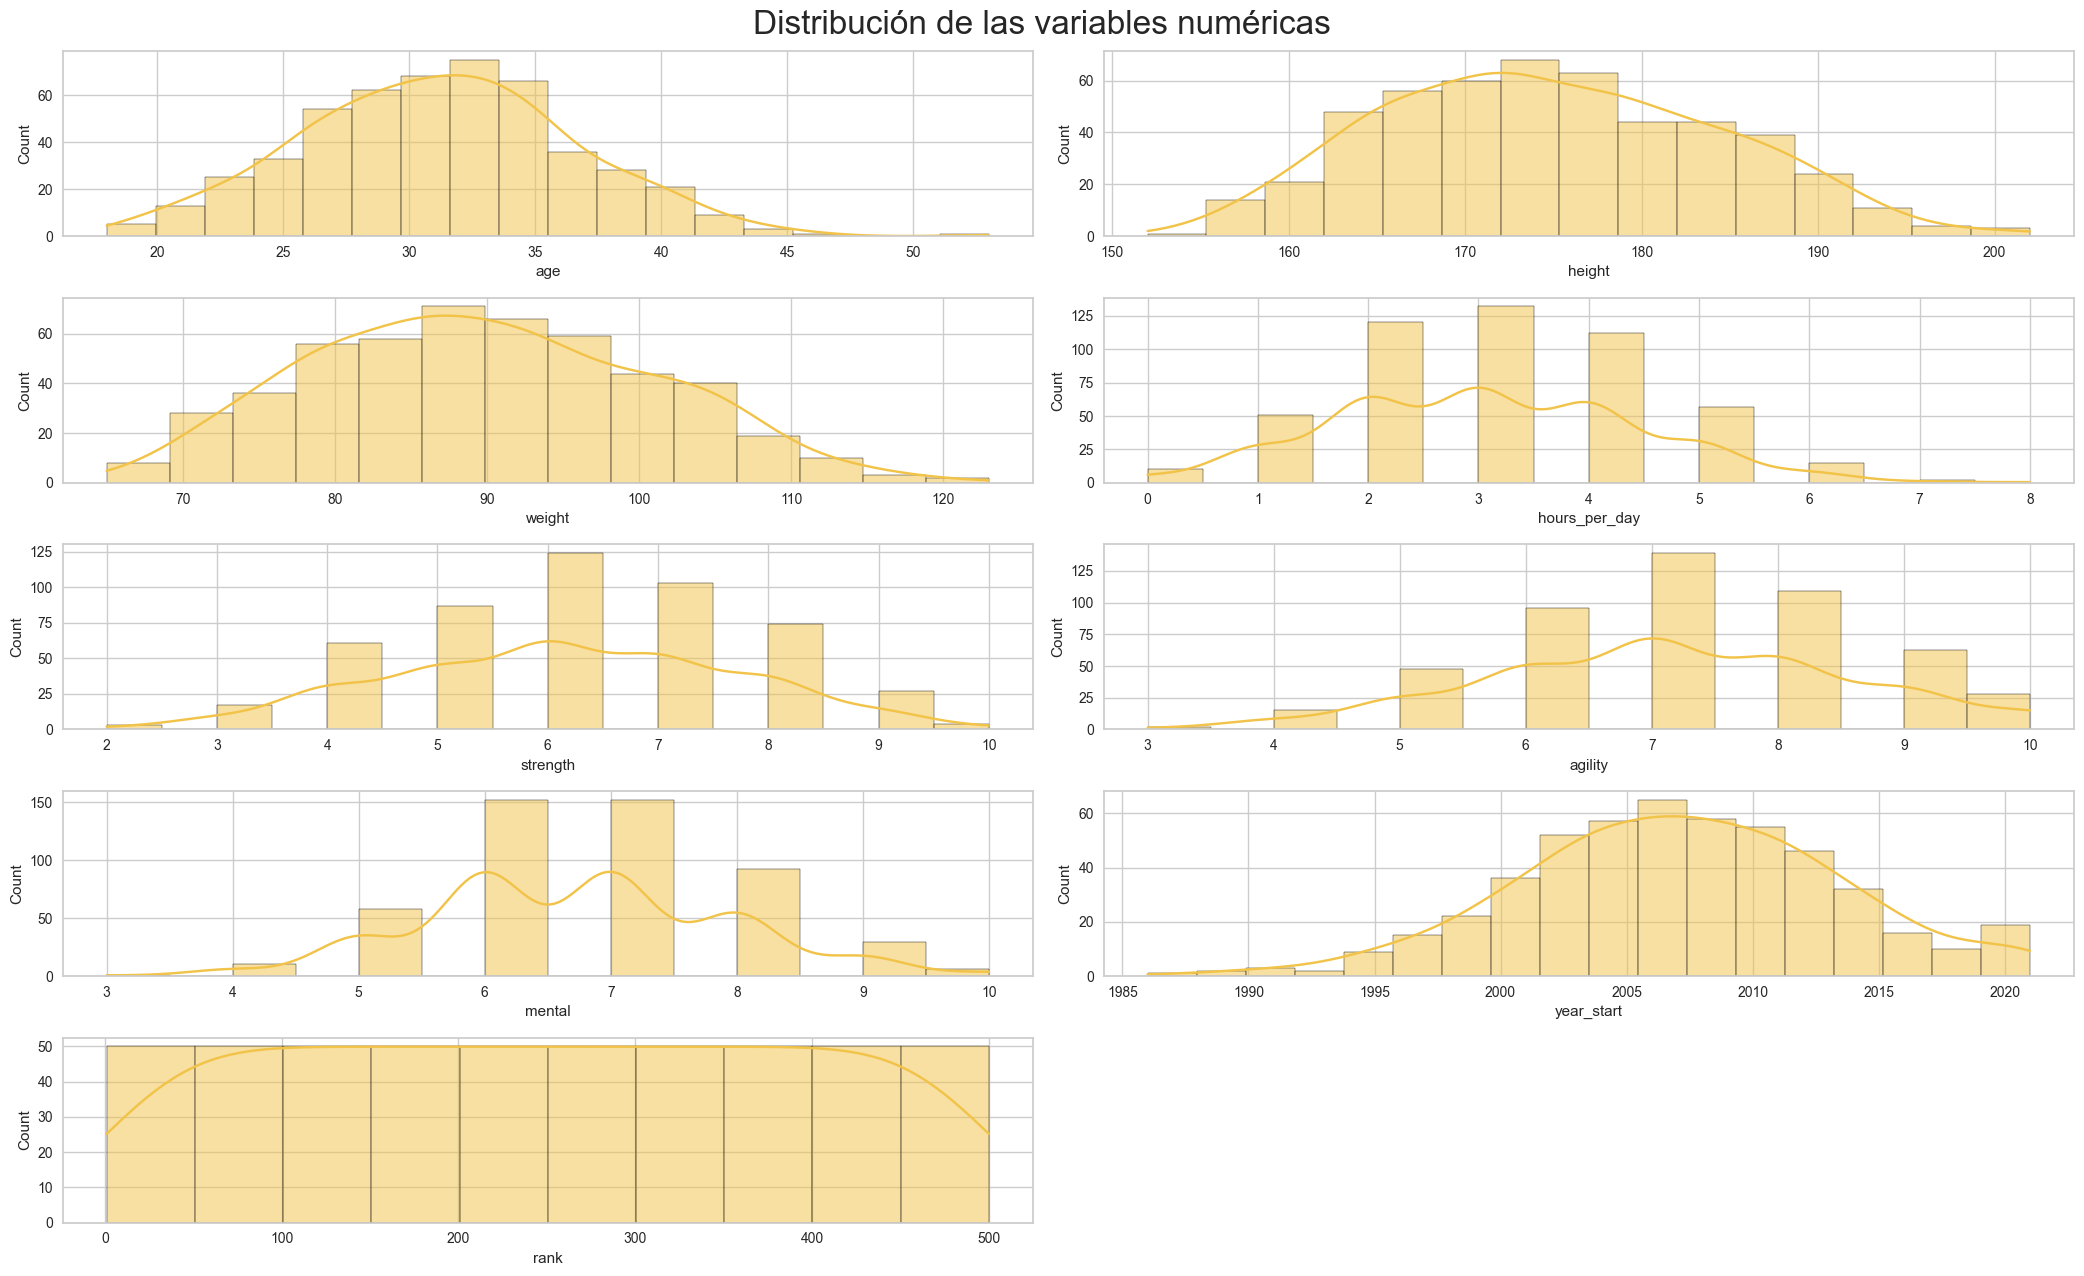

In [49]:
preprocesar.visualizar_numericas()


Hay pocos outliers presentes en las variables año de comienzo, Edad y horas de entreno por dia. Veamos cuántos y en que porcentaje:

In [53]:
so.describe_outliers(df)

columna  n_outliers  limite_inf  limite_sup  %_outliers
7     year_start           3   1991.0000   2023.0000         0.6
0            age           1     15.0000     47.0000         0.2
3  hours_per_day           1     -1.0000      7.0000         0.2
2         weight           0     55.5000    123.5000         0.0
1         height           0    146.3125    202.8125         0.0
4       strength           0      2.0000     10.0000         0.0
5        agility           0      3.0000     11.0000         0.0
6         mental           0      3.0000     11.0000         0.0
8           rank           0   -248.5000    749.5000         0.0

Ni los eliminamos ni los imputamos porque son datos validos del modelo que son plausibles en un conjunto de atletas.


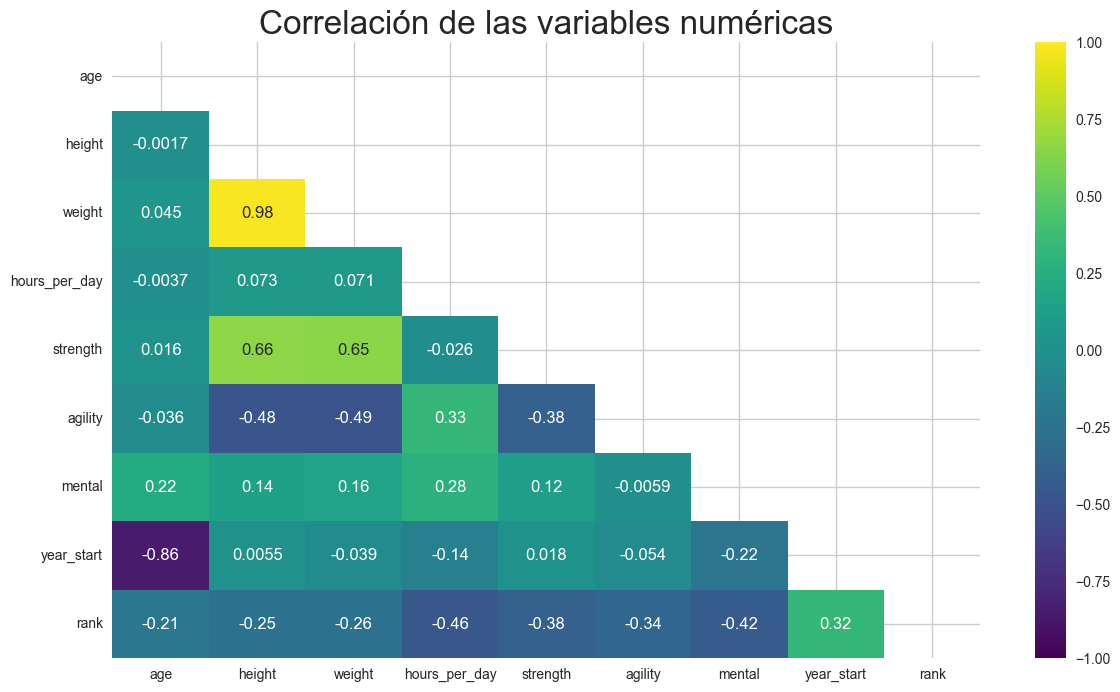

In [54]:
# evaluamos la correlación entre las variables numéricas
preprocesar.correlacion()


Correlación fuerte directa ente altura y peso, a más altura más peso.
Correlacion fuerte directa entre peso y fuerza, a más peso maá fuerza.
Correlacion fuerte directa entre altura y fuerza, a más altura más fuerza.
Correlacion fuerte inversa entre edad y año de comiento, mientras mas mayor mas años hace que empezaste.

Eliminamos la columna name que es irrelevante para el análisis


In [55]:
df.drop(columns=["name"], inplace=True)

Analizamos la dispersión de cada variable numérica frene a las categóricas

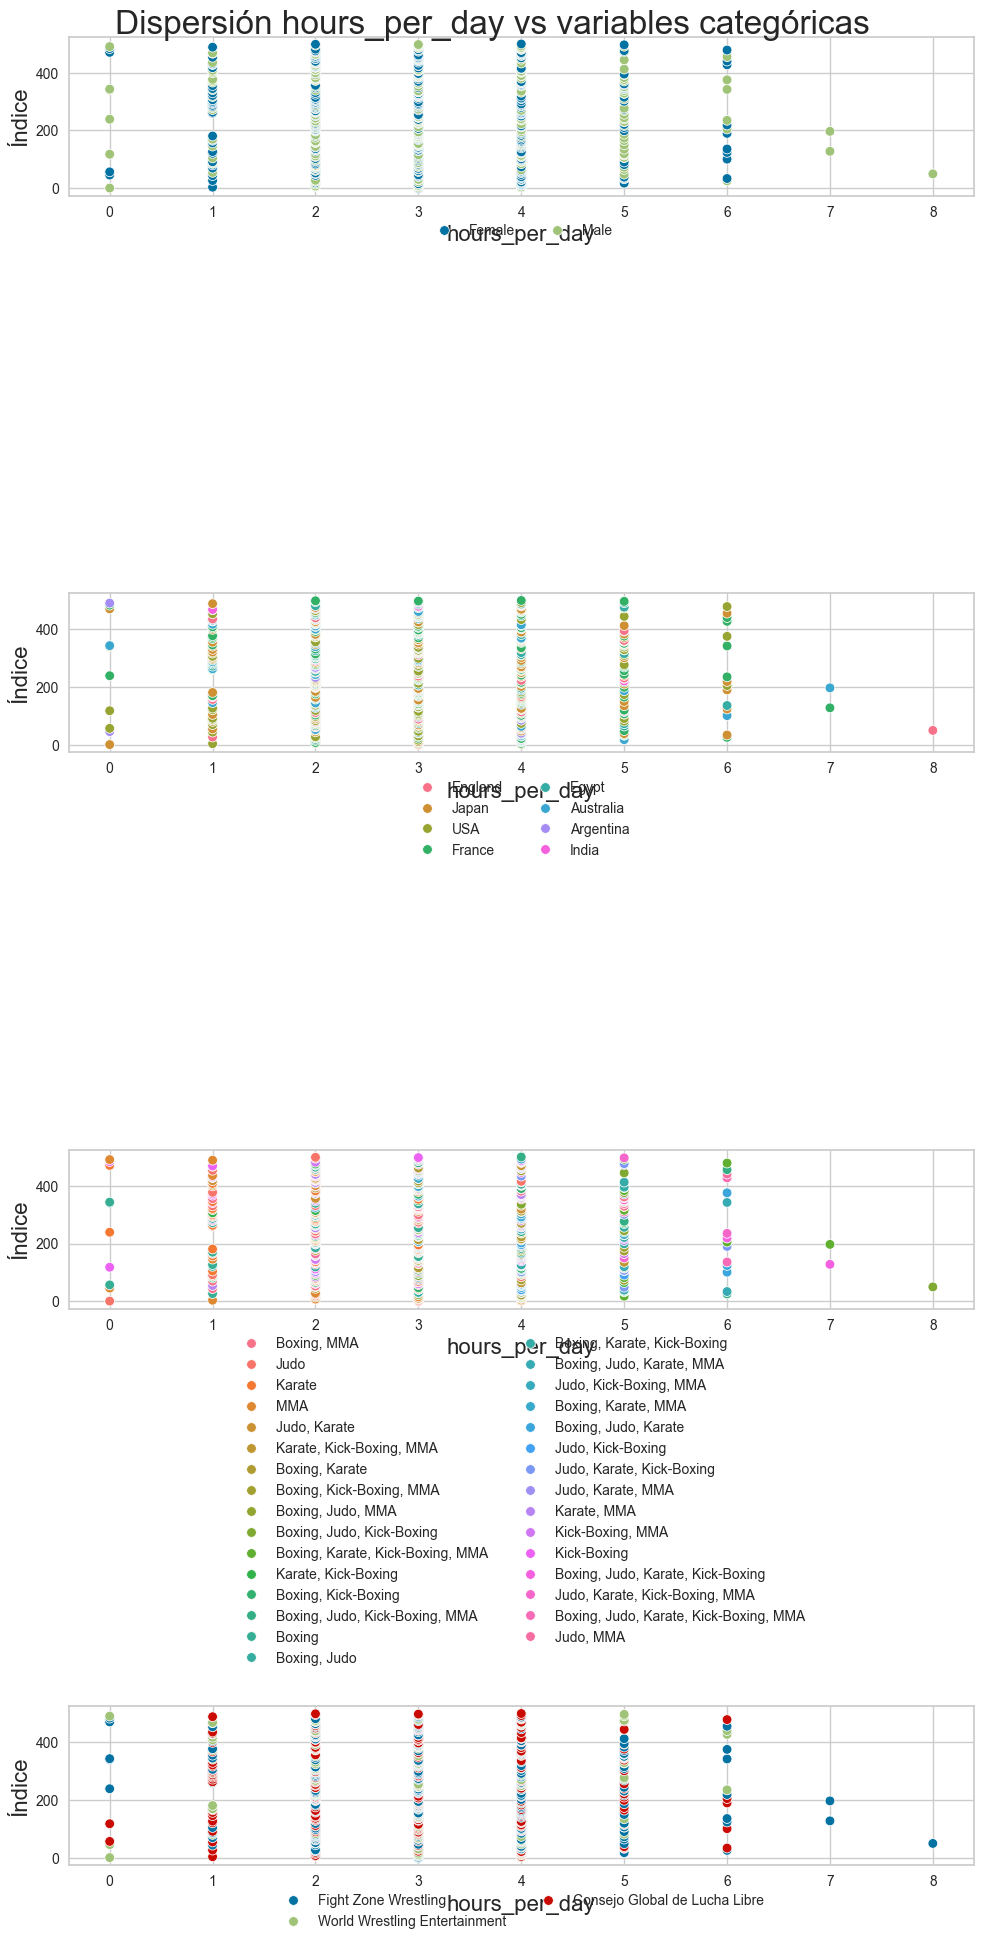

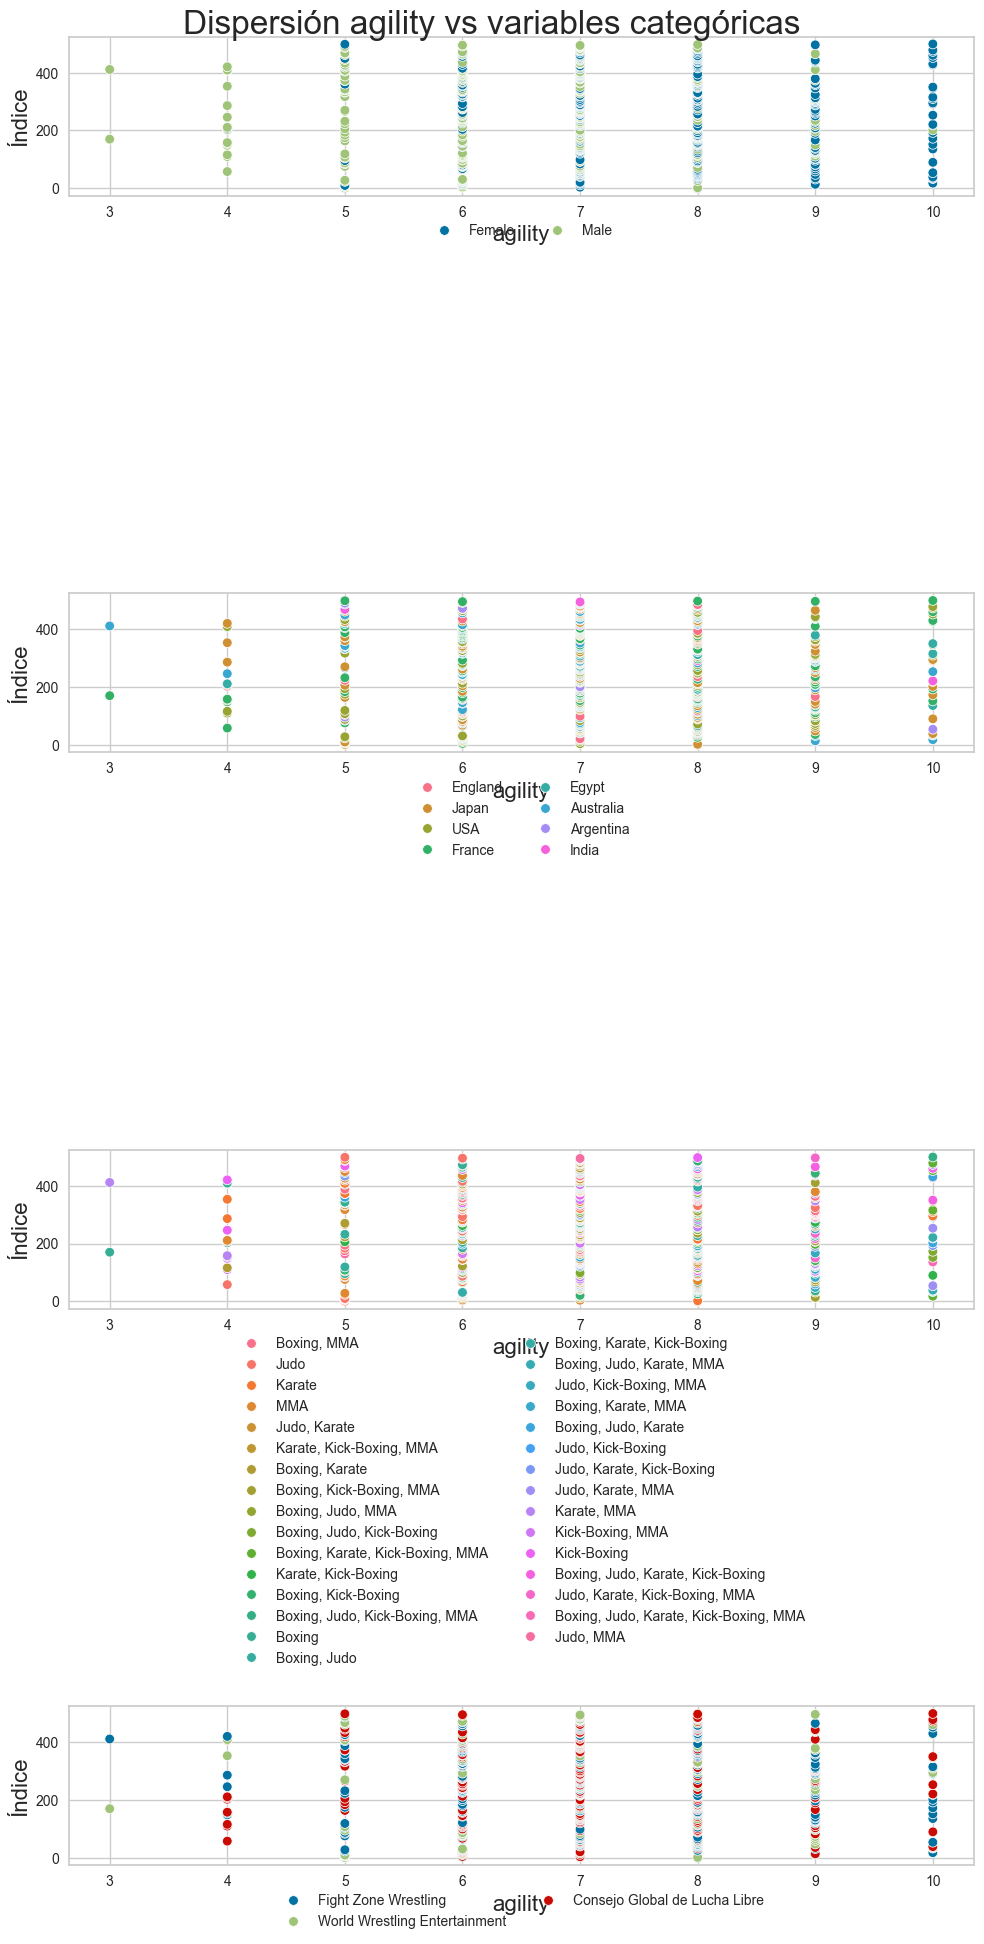

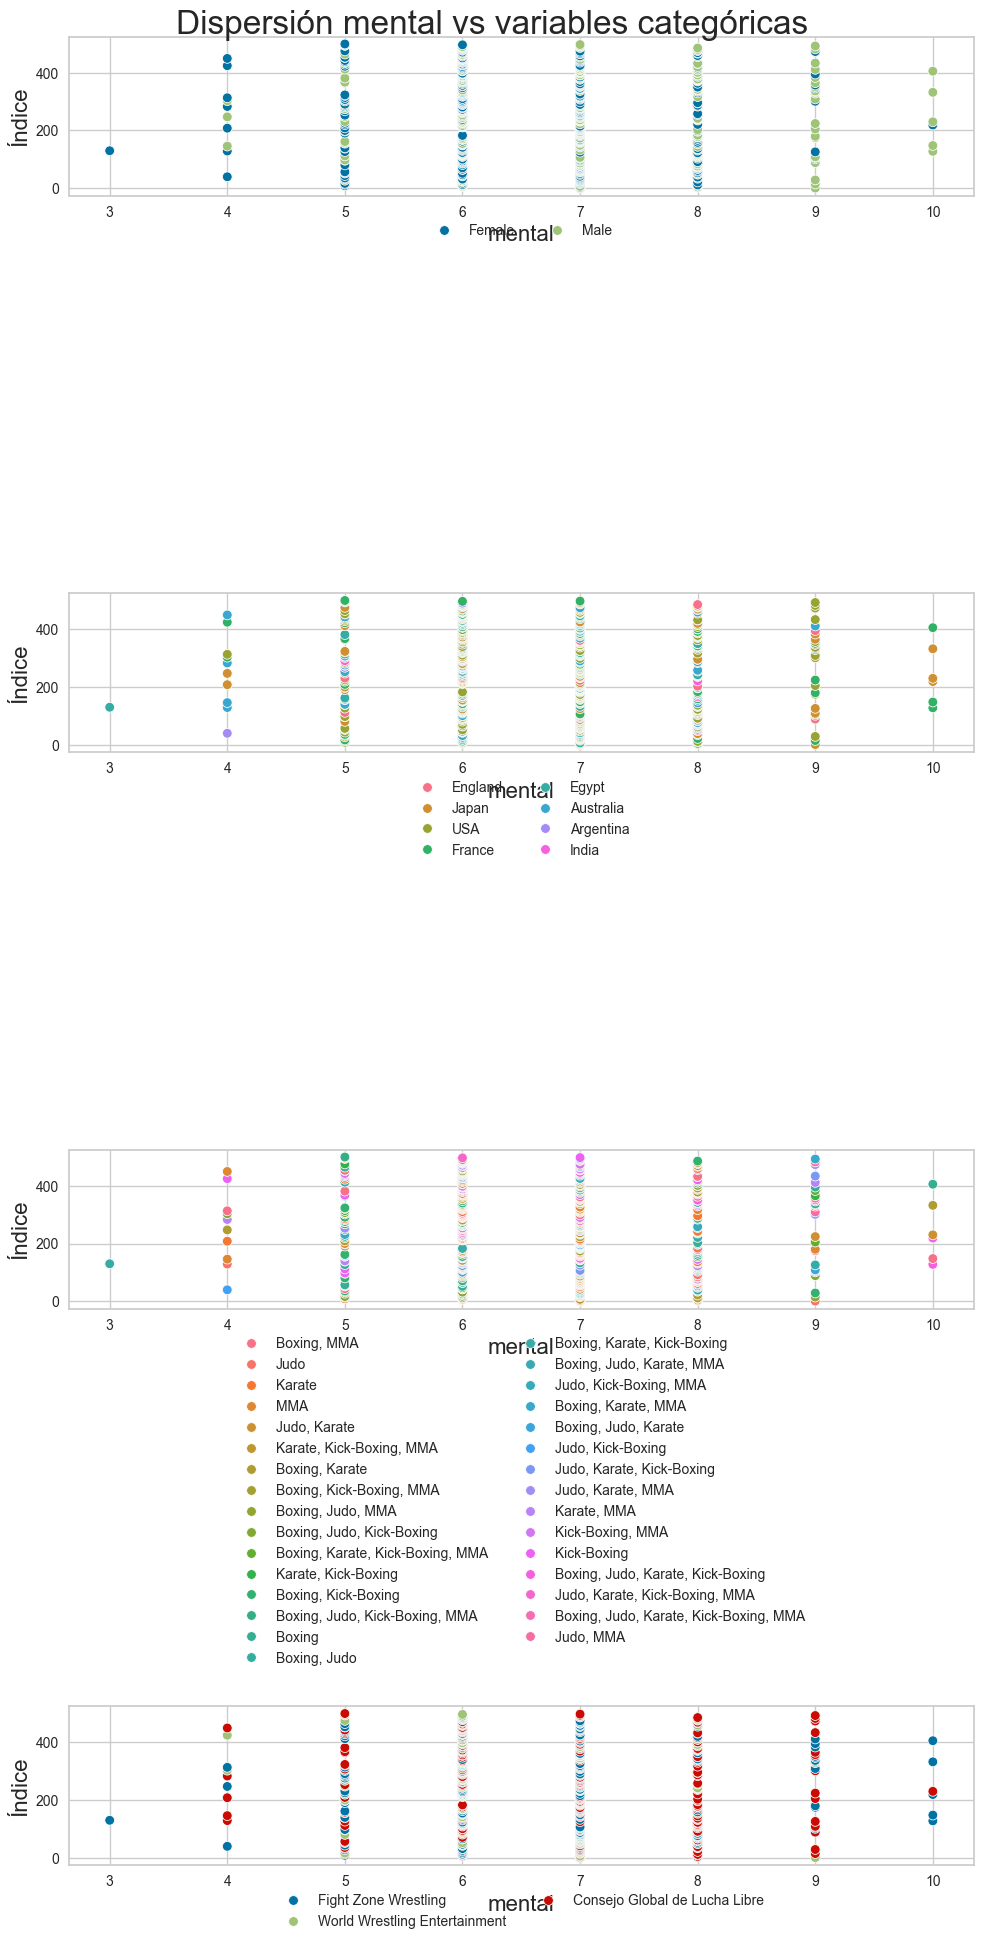

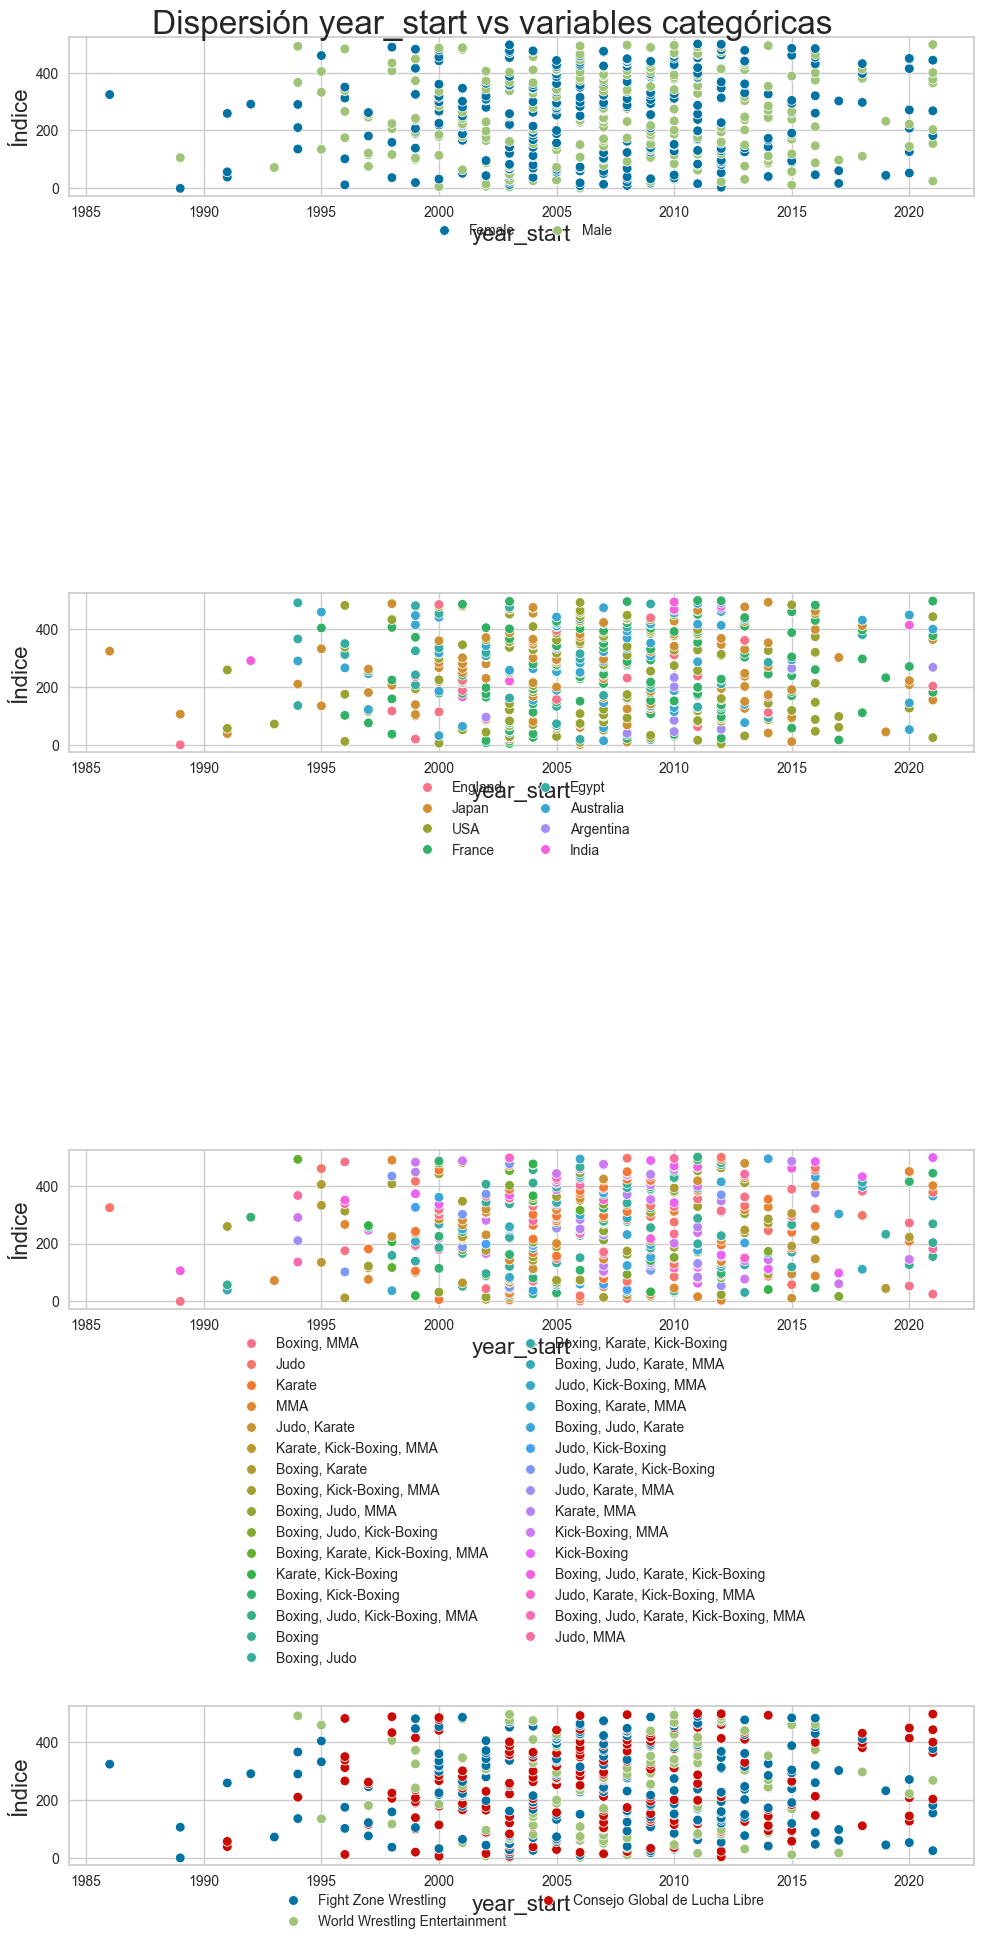

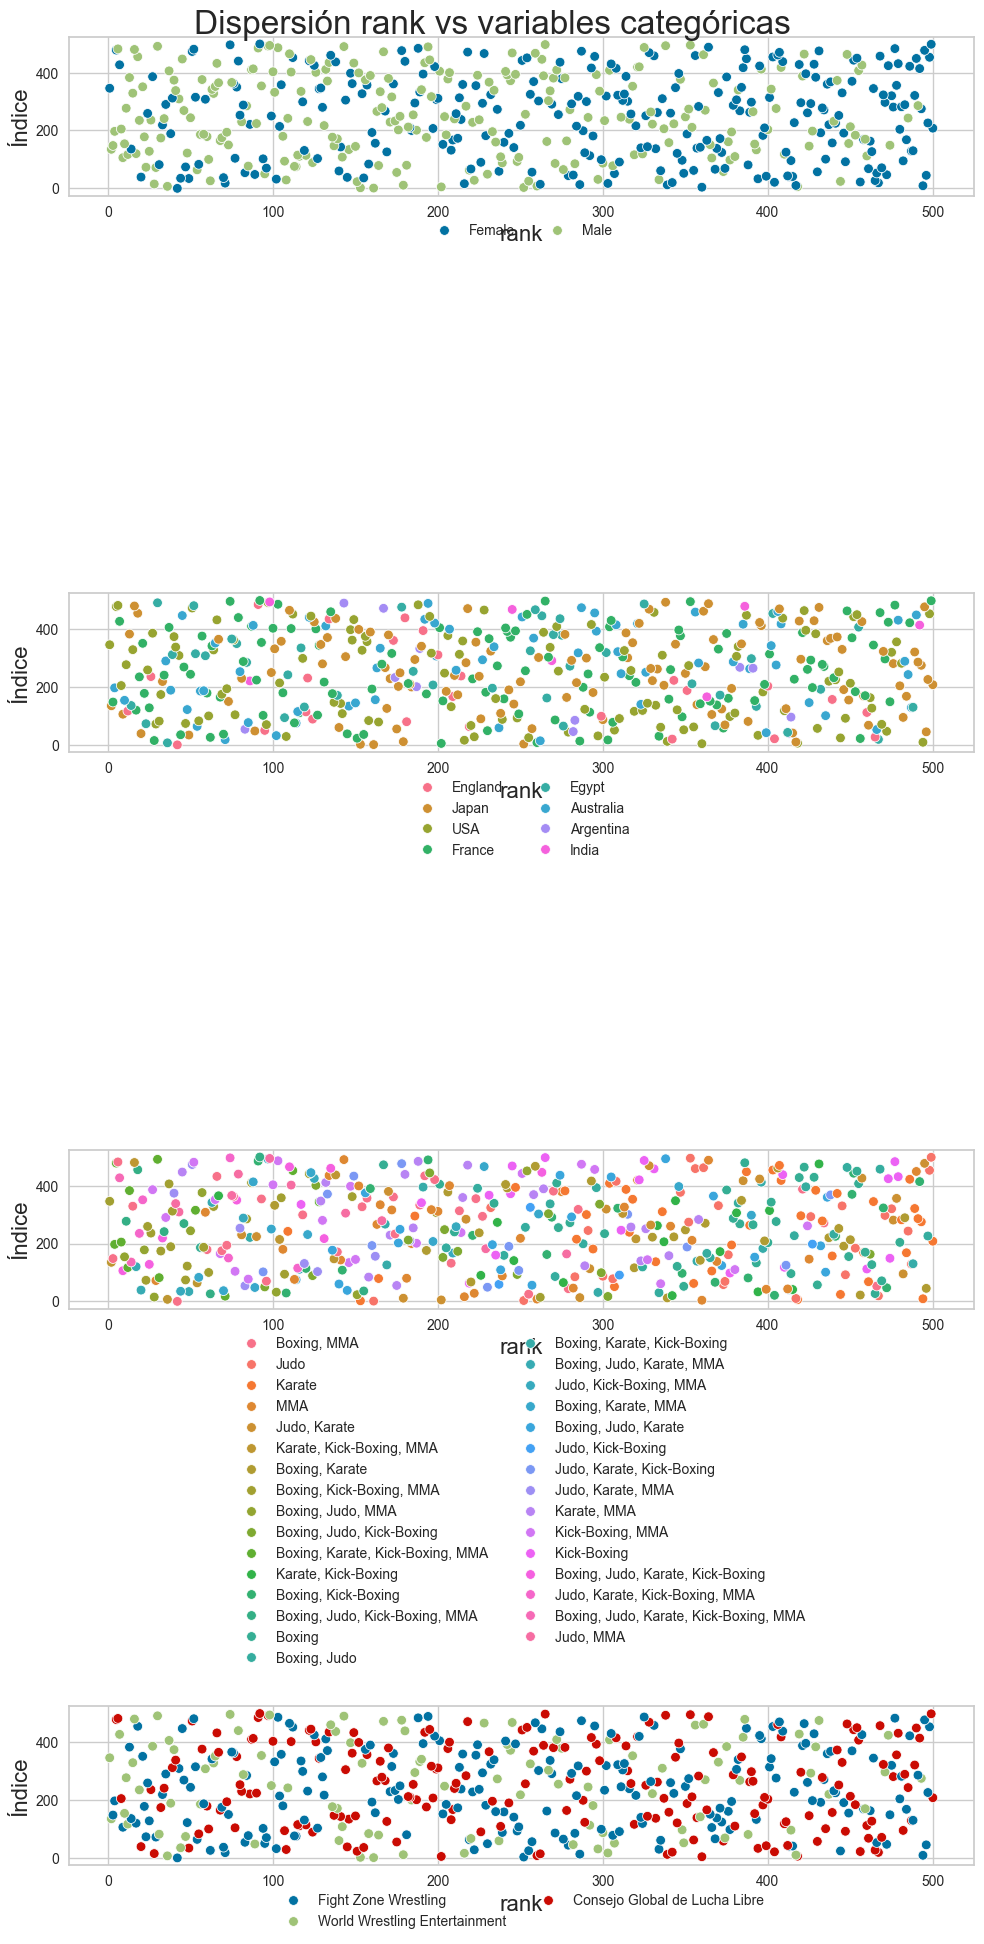

In [56]:
preprocesar = sc.Exploracion(df)
preprocesar.visualizar_categoricas_numericas()

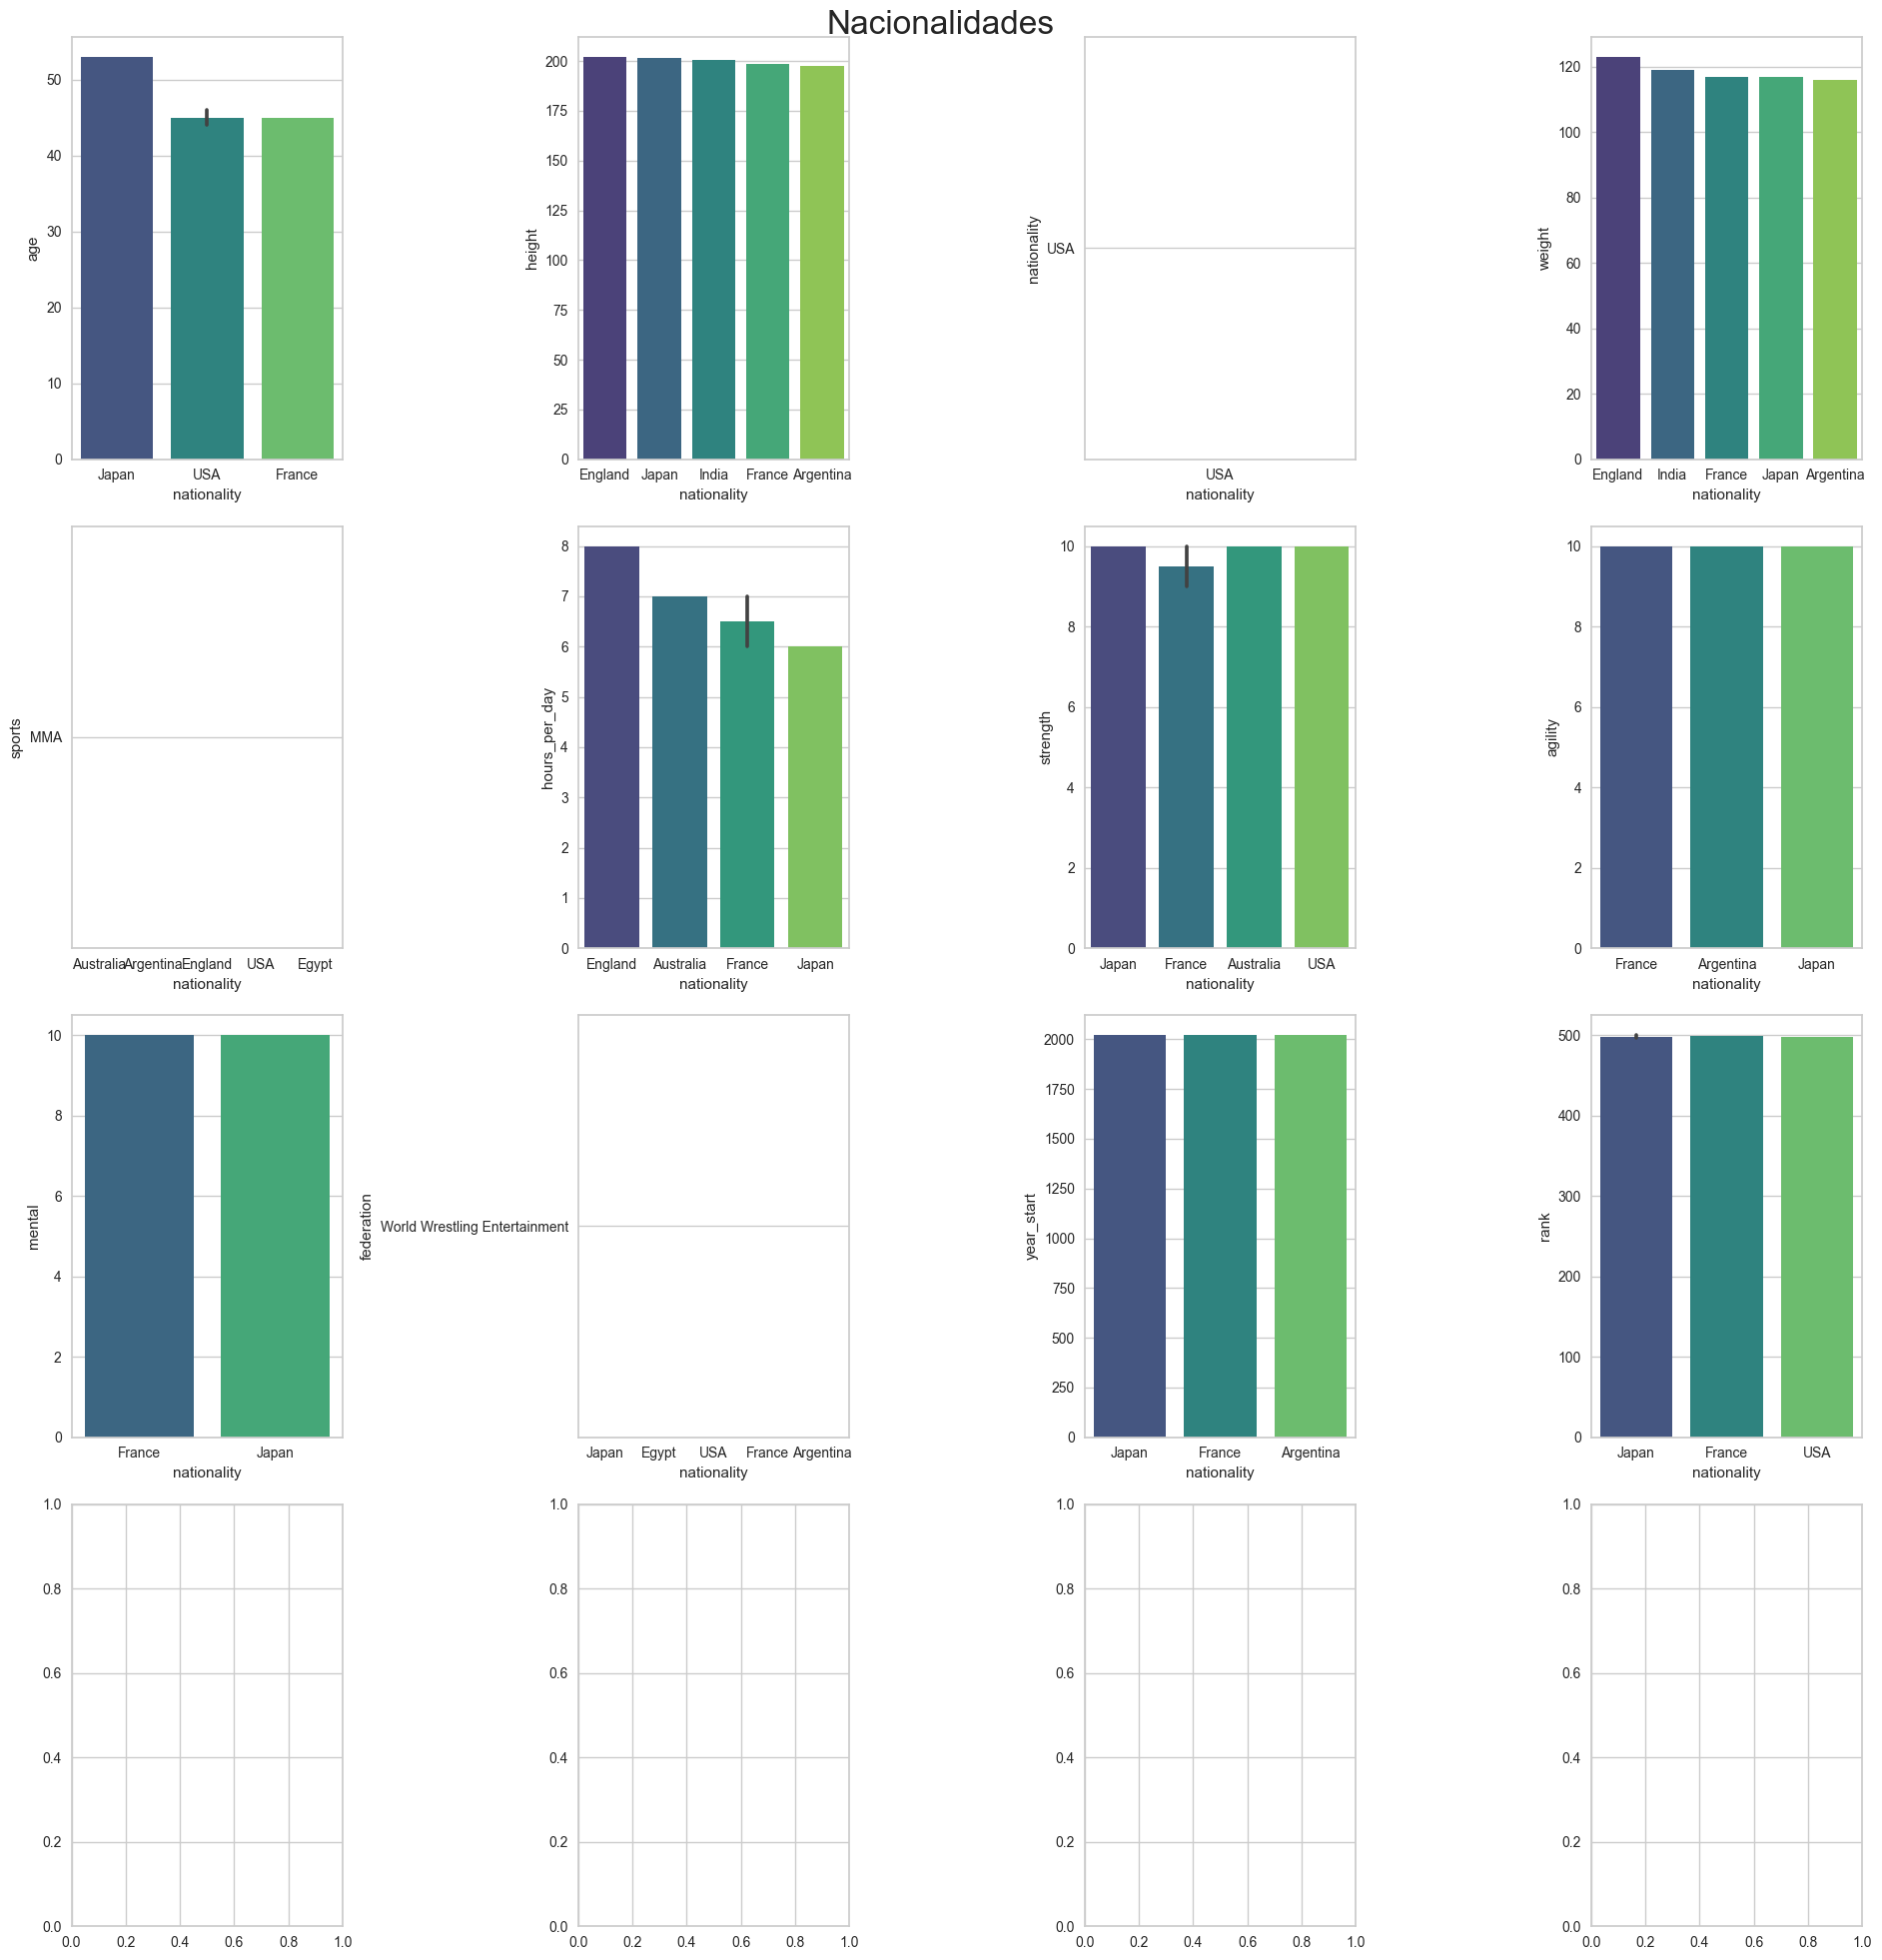

In [ ]:
# vamos a mirar cuales son los países con mejores condiciones para cada una de las columnas categóricas que tenemos en el conjunto de datos
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(19, 20))
axes = axes.flat
columns = df.columns[1:]
plt.suptitle("Nacionalidades", fontsize=24)
for x, col in enumerate(columns):
    sorted_df = df.sort_values(by=col, ascending=False)
    sns.barplot(x="nationality", y=col, data=sorted_df.head(5), ax=axes[x], palette="viridis")
plt.tight_layout()

No se ven diferencias en las variables categóricas con respecto a las nacionalidades

In [ ]:
# Hacemos lo mismo con el genero.
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(19, 20))
axes = axes.flat
columns = df.columns[1:]
plt.suptitle("Generos", fontsize=24)
for x, col in enumerate(columns):
    sorted_df = df.sort_values(by=col, ascending=False)
    sns.barplot(x="gender", y=col, data=sorted_df.head(5), ax=axes[x], palette="viridis")
plt.tight_layout()

En genero si obseravamos diferencias significativas entre las categorias, probablemente fruto de la diferencia biológica entre hombres y mujeres.



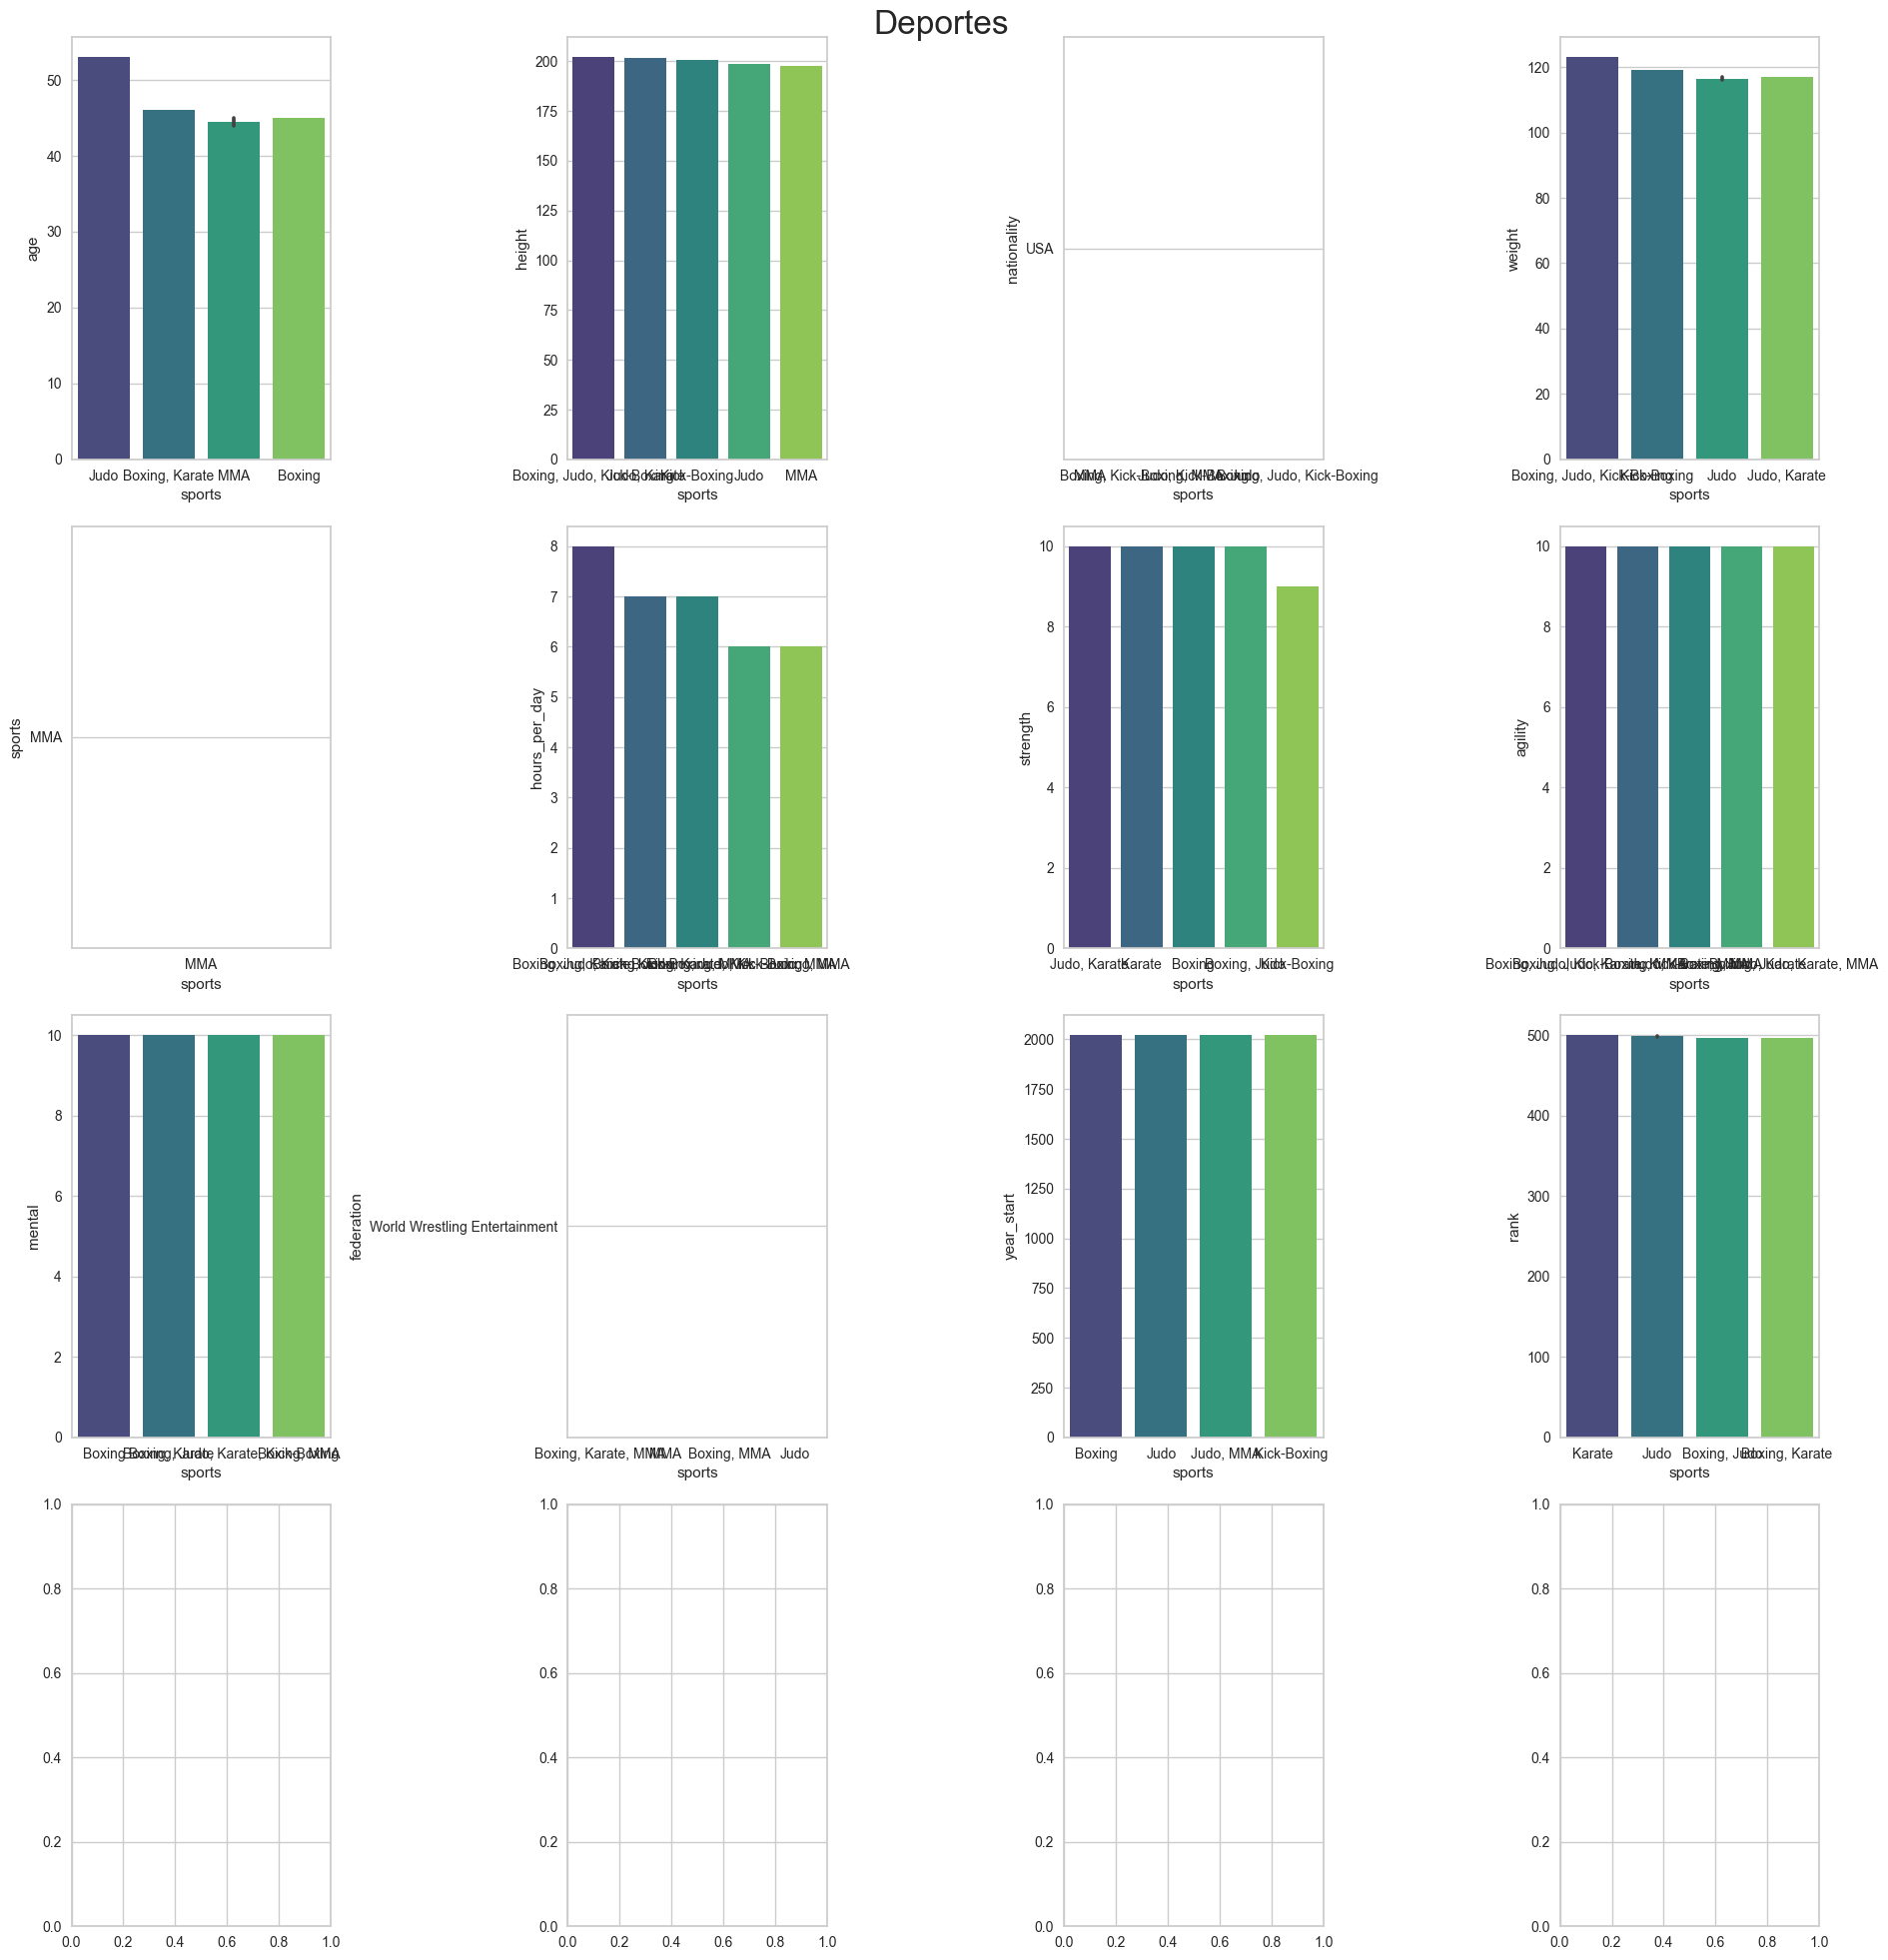

In [ ]:
# Finalmente, hacemos el mismo estudio también para cada deporte
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(19, 20))
axes = axes.flat
columns = df.columns[1:]
plt.suptitle("Deportes", fontsize=24)
for x, col in enumerate(columns):
    sorted_df = df.sort_values(by=col, ascending=False)
    sns.barplot(x="sports", y=col, data=sorted_df.head(5), ax=axes[x], palette="viridis")
plt.tight_layout()


No hay apenas diferencias si miramos por deportes excepto en horas por dias y edad que sí que hay una pequeña diferencia



Procedemos ahora a hacer el estandarizado.

In [57]:
# instanciamos la clase de Preprocesado de datos antes de aplicar el algoritmo
preprocesar = sc.Preprocesado(df)

# estandarizamos los datos
df_copia = preprocesar.estandarizar()

# chequeamos que se estandarizó correctamente
df_copia.head()

gender       age    height nationality    weight       sports  \
0  Female  1.812234 -1.042800     England -0.694439  Boxing, MMA   
1    Male  0.891945  1.071555       Japan  0.931459         Judo   
2    Male -0.396461  0.384390       Japan  0.299165       Karate   
3    Male  1.444118  1.335850       Japan  1.563753         Judo   
4  Female -0.396461 -1.782824         USA -1.597716          MMA   

   hours_per_day  strength   agility    mental                     federation  \
0      -0.046579  0.541447  0.585973  0.223943           Fight Zone Wrestling   
1      -2.229969  1.179947 -1.477311  1.895156  World Wrestling Entertainment   
2       0.681218  1.179947  0.585973  0.223943  World Wrestling Entertainment   
3      -0.046579  0.541447 -0.789550  1.059549           Fight Zone Wrestling   
4      -1.502172 -0.735551 -0.101789  0.223943  Consejo Global de Lucha Libre   

   year_start      rank  
0   -2.868861 -1.444533  
1   -0.178809 -0.620075  
2    0.770621 -0.675501  
3   -0.653524  0.010392  
4    0.770621  0.758640

Procedemos con el encoding

In [58]:

preprocesar.codificar()

gender       age    height  nationality    weight  sports  hours_per_day  \
0      0.53  1.812234 -1.042800        0.052 -0.694439   0.062      -0.046579   
1      0.47  0.891945  1.071555        0.232  0.931459   0.058      -2.229969   
2      0.47 -0.396461  0.384390        0.232  0.299165   0.084       0.681218   
3      0.47  1.444118  1.335850        0.232  1.563753   0.058      -0.046579   
4      0.53 -0.396461 -1.782824        0.230 -1.597716   0.068      -1.502172   
..      ...       ...       ...          ...       ...     ...            ...   
495    0.47  0.523829  1.124414        0.236  1.292770   0.058      -0.774376   
496    0.53 -0.028345 -1.412812        0.236 -1.688044   0.010       1.409014   
497    0.47 -1.684866  1.441567        0.236  1.112115   0.040      -0.046579   
498    0.53  0.155713  0.225813        0.236  0.208838   0.058      -0.774376   
499    0.53 -1.868924 -0.461352        0.236 -0.423456   0.014       0.681218   

     strength   agility    mental  federation  year_start      rank  
0    0.541447  0.585973  0.223943       0.412   -2.868861 -1.444533  
1    1.179947 -1.477311  1.895156       0.204   -0.178809 -0.620075  
2    1.179947  0.585973  0.223943       0.204    0.770621 -0.675501  
3    0.541447 -0.789550  1.059549       0.412   -0.653524  0.010392  
4   -0.735551 -0.101789  0.223943       0.384    0.770621  0.758640  
..        ...       ...       ...         ...         ...       ...  
495  1.818446 -0.789550 -1.447270       0.384    0.137667  0.710142  
496 -1.374051  1.273734 -0.611664       0.204   -0.653524 -1.222830  
497  1.179947  0.585973  0.223943       0.384    2.194766  0.100459  
498 -0.735551 -1.477311 -1.447270       0.384    0.770621  1.721662  
499 -0.097052  1.961495 -1.447270       0.384    0.612382 -1.098122  

[500 rows x 13 columns]

In [59]:
df_copia.head()

gender       age    height  nationality    weight  sports  hours_per_day  \
0    0.53  1.812234 -1.042800        0.052 -0.694439   0.062      -0.046579   
1    0.47  0.891945  1.071555        0.232  0.931459   0.058      -2.229969   
2    0.47 -0.396461  0.384390        0.232  0.299165   0.084       0.681218   
3    0.47  1.444118  1.335850        0.232  1.563753   0.058      -0.046579   
4    0.53 -0.396461 -1.782824        0.230 -1.597716   0.068      -1.502172   

   strength   agility    mental  federation  year_start      rank  
0  0.541447  0.585973  0.223943       0.412   -2.868861 -1.444533  
1  1.179947 -1.477311  1.895156       0.204   -0.178809 -0.620075  
2  1.179947  0.585973  0.223943       0.204    0.770621 -0.675501  
3  0.541447 -0.789550  1.059549       0.412   -0.653524  0.010392  
4 -0.735551 -0.101789  0.223943       0.384    0.770621  0.758640

Una vez que nuestros datos están preprocesados, aplciamos el metodo del codo ppara elegir el numero  de clusters adecuado

In [ ]:
# instanciamos la clase de clustering
modelos = sc.Clustering(df_copia)

# sacamos el número de clusters óptimos para hacer el Kmeans 
modelos.sacar_clusters_kmeans()

Interpretemos lo que nos dice esta gráfica:

La gráfica muestra el silhouette score para diferentes números de clusters (K) utilizando el método K-Means.

Eje X (k): Número de clusters evaluados (3 a 15).

Eje Y Izquierdo: Silhouette score, el cual mide la calidad de los clusters en baso a os separados que están y lo compactos son los puntos dentro de cada cluster.

Eje Y Derecho: Tiempo de ajuste del modelo.

Nos fijamos en que:

    - El silhouette score es más alto cuando K=2, alcanzando el valor 0.219

    - La línea negra discontinua marca el "codo" en K=2, sugiriendo que este número de clusters proporciona la mejor separación y cohesión de los datos.

Aplicamos el Kmeans con los clusters que nos indica el metodo del codo (2)

In [ ]:
df, labels  = modelos.modelo_kmeans(df, 2)
# mostramos el DataFrame
df.head()

gender       age    height  nationality    weight  sports  hours_per_day  \
0    0.53  1.812234 -1.042800        0.052 -0.694439   0.062      -0.046579   
1    0.47  0.891945  1.071555        0.232  0.931459   0.058      -2.229969   
2    0.47 -0.396461  0.384390        0.232  0.299165   0.084       0.681218   
3    0.47  1.444118  1.335850        0.232  1.563753   0.058      -0.046579   
4    0.53 -0.396461 -1.782824        0.230 -1.597716   0.068      -1.502172   

   strength   agility    mental  federation  year_start      rank  \
0  0.541447  0.585973  0.223943       0.412   -2.868861 -1.444533   
1  1.179947 -1.477311  1.895156       0.204   -0.178809 -0.620075   
2  1.179947  0.585973  0.223943       0.204    0.770621 -0.675501   
3  0.541447 -0.789550  1.059549       0.412   -0.653524  0.010392   
4 -0.735551 -0.101789  0.223943       0.384    0.770621  0.758640   

  clusters_kmeans  
0               1  
1               0  
2               0  
3               0  
4               1

In [ ]:
modelos.calcular_metricas(labels=labels)


silhouette_score  davies_bouldin_index  cardinalidad
0          0.239454              1.606451           222

El silhouette está más cercano a 0 que a 1, por lo que es posible que haya solapamiento entre los clusters

El davies_bouldin_index nos dice que los custers no son muy compactos y no están completamente separados

Y la cardinaldiad, nos dice el numero de puntos asignados a cada cluster, en este caso 222

Haemos una visualización de los clusters

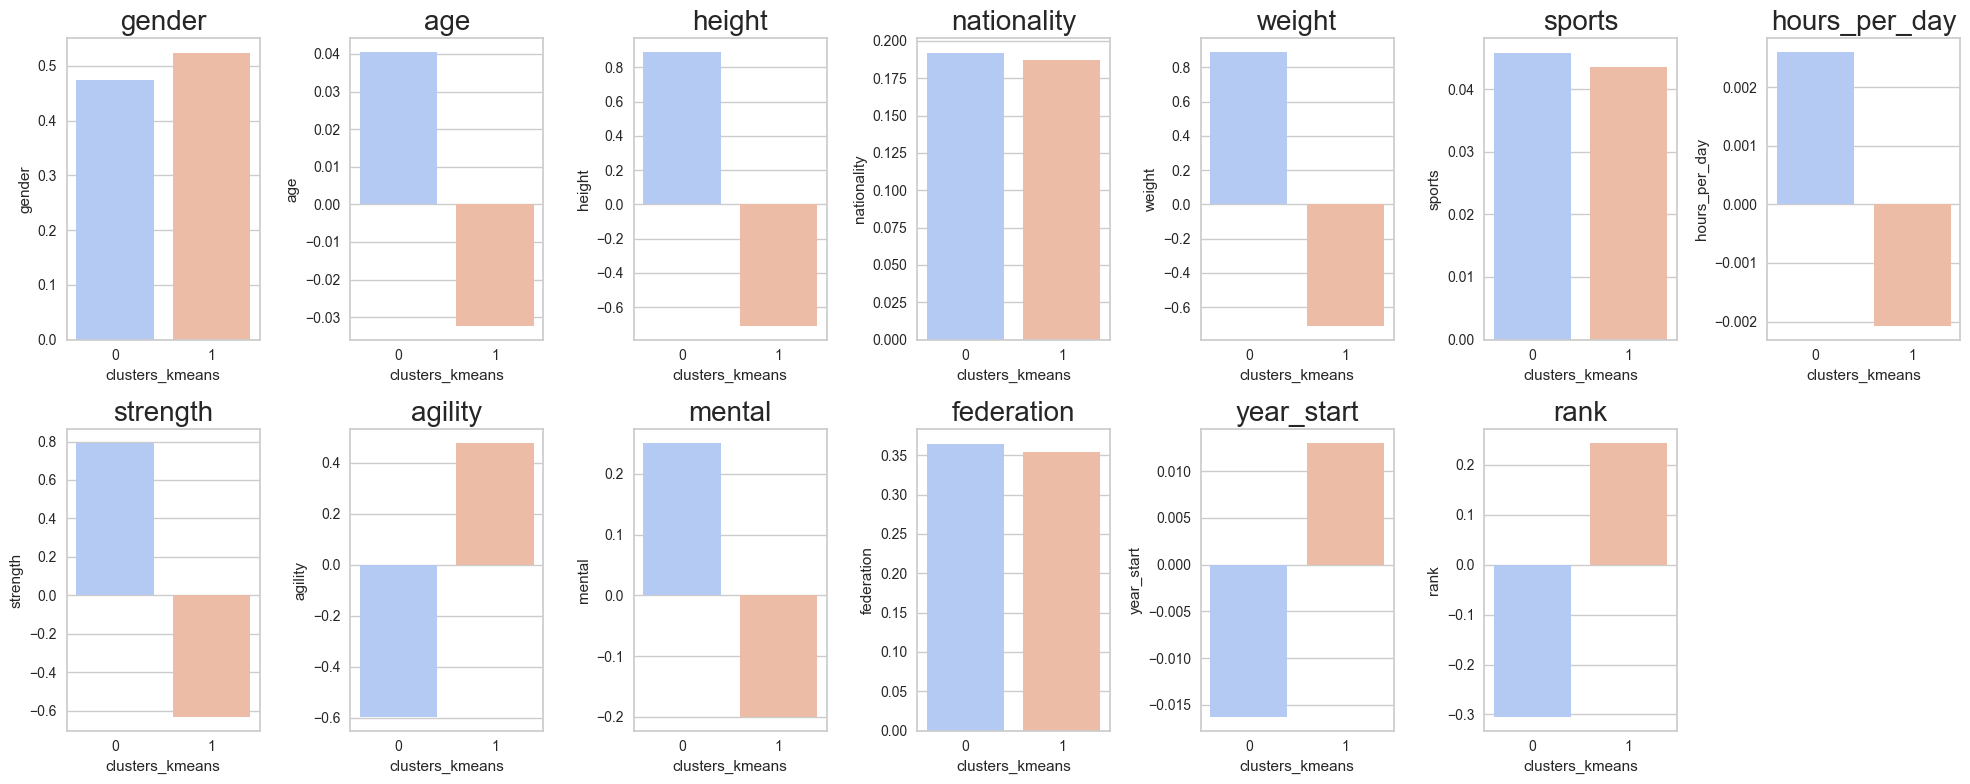

In [ ]:
columnas_plot = df.columns.drop("clusters_kmeans")

# Crear subplots
fig, axes = plt.subplots(nrows=2, ncols=math.ceil(len(columnas_plot) / 2), figsize=(20, 8))
axes = axes.flat

for indice, columna in enumerate(columnas_plot):
    df_group = df.groupby("clusters_kmeans")[columna].mean().reset_index()
    sns.barplot(x="clusters_kmeans", y=columna, data=df_group, ax=axes[indice], palette="coolwarm")
    axes[indice].set_title(columna, fontsize=20)

plt.tight_layout()

# Eliminar ejes vacíos si existen
if len(columnas_plot) % 2 != 0:
    fig.delaxes(axes[-1])

plt.show()

In [ ]:
gender_distribution = df.groupby("clusters_kmeans",)['gender'].value_counts(normalize=True).unstack()
print(gender_distribution)

gender               0.47      0.53
clusters_kmeans                    
0                0.927928  0.072072
1                0.104317  0.895683


En el cluster 0 predominan los hombres y en el 1 las mujeres

In [ ]:
age_distribution = df.groupby("clusters_kmeans",)['age'].mean()
age_distribution

clusters_kmeans
0    0.040470
1   -0.032317
Name: age, dtype: float64

El promedio de edad es ligeramente más alto en el cluster 0.

In [ ]:
height_distribution = df.groupby("clusters_kmeans",)['height'].mean()
print(height_distribution)

clusters_kmeans
0    0.889644
1   -0.710435
Name: height, dtype: float64


Claramente el cluster 0 agrupa a gente más alta que el 1

In [ ]:
nationality_distribution = df.groupby("clusters_kmeans",)['nationality'].value_counts(normalize=True).unstack()
nationality_distribution

nationality         0.014     0.024     0.052     0.084     0.128     0.230  \
clusters_kmeans                                                               
0                0.009009  0.018018  0.054054  0.081081  0.126126  0.229730   
1                0.017986  0.028777  0.050360  0.086331  0.129496  0.230216   

nationality         0.232     0.236  
clusters_kmeans                      
0                0.207207  0.274775  
1                0.251799  0.205036

En las nacionaldiades parece haber bastante solapamiento, ya que en muchas de ellas hay porcenajes similares de gente en los dos grupos


In [ ]:
weight_distribution = df.groupby("clusters_kmeans",)['weight'].mean()
print(weight_distribution)

clusters_kmeans
0    0.888737
1   -0.709711
Name: weight, dtype: float64


Los del cluster 0 pesan más que los del clsuter 1, cosa de esperar dado el agrupamiento que vimos en altura y la elevadisima correlación entre peso y altura

In [ ]:
sports_distribution = df.groupby("clusters_kmeans",)['sports'].value_counts(normalize=True).unstack()
sports_distribution

sports              0.004     0.008     0.010     0.012     0.014     0.016  \
clusters_kmeans                                                               
0                     NaN  0.009009  0.009009       NaN  0.018018  0.040541   
1                0.007194  0.007194  0.028777  0.021583  0.010791  0.053957   

sports              0.018     0.020     0.022     0.024     0.026     0.028  \
clusters_kmeans                                                               
0                0.031532  0.031532  0.022523  0.013514  0.013514  0.031532   
1                0.039568  0.010791  0.021583  0.032374  0.035971  0.025180   

sports              0.030     0.036     0.038     0.040     0.042     0.044  \
clusters_kmeans                                                               
0                0.018018  0.040541  0.085586  0.139640  0.036036  0.049550   
1                0.039568  0.032374  0.068345  0.104317  0.046763  0.039568   

sports              0.052     0.058     0.062     0.066     0.068     0.084  
clusters_kmeans                                                              
0                0.063063  0.054054  0.067568  0.067568  0.085586  0.072072  
1                0.043165  0.061151  0.057554  0.064748  0.053957  0.093525

Los clustrers no agrupan por deportes en conctero y apreciamos que en la mayoría de deportes hay un porcenaje similar de alteltas (con algunas diferencias, pero que no permiten apreciar un patrón de agrupamiento claro) en ambos clusters

In [ ]:
hours_per_day_distribution = df.groupby("clusters_kmeans",)['hours_per_day'].mean()
hours_per_day_distribution

clusters_kmeans
0    0.002596
1   -0.002073
Name: hours_per_day, dtype: float64

Se observa una muy ligera mayor dedicación a los deportes en horas por día en el cluster 0 que en el 1

In [ ]:
strength_distribution = df.groupby("clusters_kmeans",)['strength'].mean()
print(strength_distribution)

clusters_kmeans
0    0.791670
1   -0.632197
Name: strength, dtype: float64


El cluster 0 agrupa a personas claramente más fuertes que el cluster 1

In [ ]:
agility_distribution = df.groupby("clusters_kmeans",)['agility'].mean()
agility_distribution

clusters_kmeans
0   -0.597472
1    0.477118
Name: agility, dtype: float64

El cluster 1 agrupa a los deportistas más agiles.

In [ ]:
mental_distribution = df.groupby("clusters_kmeans",)['mental'].mean()
mental_distribution

clusters_kmeans
0    0.250290
1   -0.199872
Name: mental, dtype: float64

El cluster 0 agrupa a los de mentalidad más fuerte.

In [ ]:
federation_distribution = df.groupby("clusters_kmeans",)['federation'].value_counts(normalize=True).unstack()
print(federation_distribution)

federation          0.204     0.384     0.412
clusters_kmeans                              
0                0.175676  0.391892  0.432432
1                0.226619  0.377698  0.395683


Ambos clusters tienen porcentajes significativos de deportistas de las 3 federaciones

In [ ]:
year_start_distribution = df.groupby("clusters_kmeans",)['year_start'].mean()
print(year_start_distribution)

clusters_kmeans
0   -0.016294
1    0.013012
Name: year_start, dtype: float64


Los deportistas del cluster 1 empezaron a entrenar ligeramente más tarde que los del 0

In [ ]:
rank_distribution = df.groupby("clusters_kmeans",)['rank'].mean()
print(rank_distribution)

clusters_kmeans
0   -0.304873
1    0.243460
Name: rank, dtype: float64


Los del cluster 0 están mejor rankeados que los del 1.

### Conclusiones y recomendaciones de entrenamiento

En el cluster 0 tenemos pues a una inmensa mayoría de hombres, aunque hay algunas mujeres también, y en el cluster 1 justo al revés. Los deportistas del cluster 0 son claramente más altos, pesados y fuertes que lose del 1, en cambio tienen menor agilidad. 

Todas estas características se explican probablemente desde la división por sexos, pero además, hay dos factores, como la mentalidad y el ranking en el que los atletas con mejores cualidades en ambos están en el cluster 0, por lo que podríamos inferir que en el cluster 0 hay atletas de mayor nivel, o más de elite que en el 1. 

En cuanto a nacionaldiad, disciplina y federación, los clusters no parecen haber agrupado siguiendo patrón concreto alguno.

Pasando a las recomendaciones de entrenamiento, el que los clusters estén agrupando a deportistas de tamaño y fuerza similares, favorece el incorporar el sparring, fundamental en deportes de contacto, de una manera más segura que si hubiera mucha disparidad en estas características. 

En este aspecto, y aunque no debería haber problema entre individuos de similares cualidades físicas para el deporte, se podría si se quiere agrupar por sexos dentro de cada cluster al entrenar, aunque esto puede generar problemas de que las mujeres tendrán pocas compañeras en el cluster 0 y los hombres pocos compañeros en el cluster 1.

Como dentro de cada cluster tenemos a los deportes mezclados, necesitaremos hacer subgrupos por deporte, con un plan específico para cada uno.

Para mejorar las cualidades más bajas en cada cluster, los del 0 ueden centrase en entrenamientos de agilidad, mientras que los del 1 en entrenamientos de fuerza.

Por último, dado el superior ranking de los del cluster 0 podemos hacer un planning más orientado a la competición de elite, por ejemplo invitando a entrenar a atletas de elite de otras federaciones.

## Aglomerativo

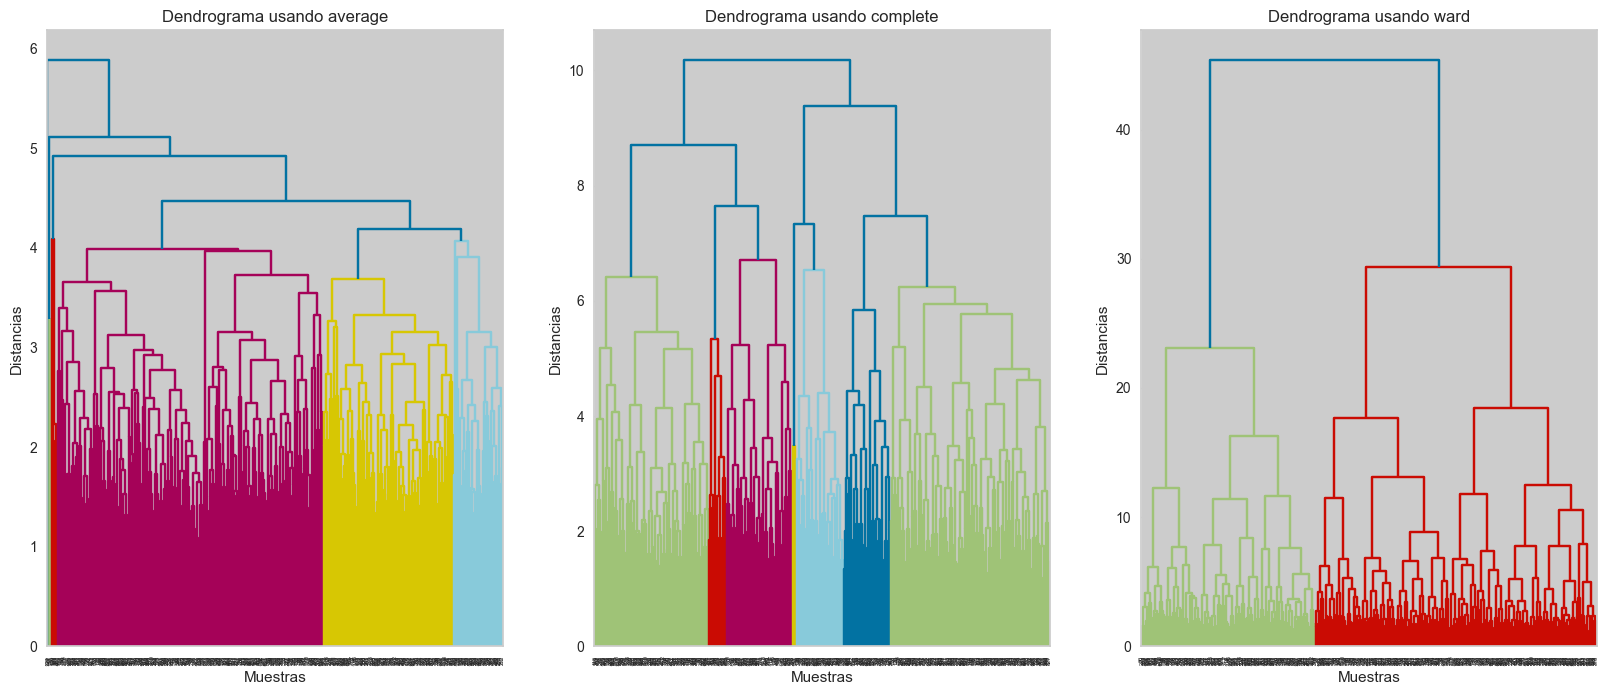

In [ ]:
# instanciamos la clase de clustering
modelos = sc.Clustering(df_copia)
# visualizamos los dendrogramas para saber que método de distancia es el mejor para nuestros datos
modelos.visualizar_dendrogramas()

Observamos que el número de clusters creados varía según la distancia elegida

In [ ]:
# Configuraciones de vinculación y métricas de distancia
linkage_methods = ['single', 'complete', 'average', 'ward']
distance_metrics = ['euclidean', 'cosine', 'chebyshev']

# Crear un DataFrame para almacenar los resultados
results = []

for linkage_method in linkage_methods:
    for metric in distance_metrics:
        for cluster in range(3,10):
            try:
                # Configurar el modelo de AgglomerativeClustering
                modelo = AgglomerativeClustering(
                    linkage=linkage_method,
                    metric=metric,  
                    distance_threshold=None,  # Para buscar n_clusters
                    n_clusters=cluster, # Cambia esto según tu análisis
                )
                
                # Ajustar el modelo
                labels = modelo.fit_predict(df_copia)

                # Calcular métricas si hay más de un cluster
                if len(np.unique(labels)) > 1:
                    # Silhouette Score
                    silhouette_avg = silhouette_score(df_copia, labels, metric=metric)

                    # Davies-Bouldin Index
                    db_score = davies_bouldin_score(df_copia, labels)

                    
                    # Cardinalidad (tamaño de cada cluster)
                    cluster_cardinality = {cluster: sum(labels == cluster) for cluster in np.unique(labels)}
                else:
                    inertia = float('inf')
                    cluster_cardinality = {'Cluster único': len(df_copia)}

                # Almacenar resultados
                results.append({
                    'linkage': linkage_method,
                    'metric': metric,
                    'silhouette_score': silhouette_avg,
                    'davies_bouldin_index': db_score,
                    'cluster_cardinality': cluster_cardinality,
                    'n_cluster': cluster
                })

            except Exception as e:
                print(f"Error con linkage={linkage_method}, metric={metric}: {e}")

# Crear DataFrame de resultados
results_df = pd.DataFrame(results)

# Mostrar resultados ordenados por silhouette_score
results_df = results_df.sort_values(by='silhouette_score', ascending=False)

# Mostrar el DataFrame
results_df.head(20)

Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=chebyshev: chebyshev was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=chebyshev: chebyshev was provided as metric

linkage     metric  silhouette_score  davies_bouldin_index  \
49   average     cosine          0.284904              1.913765   
14    single  chebyshev          0.284359              0.515382   
50   average     cosine          0.253422              1.738764   
0     single  euclidean          0.237146              0.515382   
28  complete     cosine          0.217554              1.903223   
53   average     cosine          0.213810              1.747915   
51   average     cosine          0.207916              1.695685   
55   average     cosine          0.200726              1.778296   
15    single  chebyshev          0.199793              0.556412   
52   average     cosine          0.198768              1.701762   
1     single  euclidean          0.198254              0.527258   
54   average     cosine          0.195529              1.749323   
29  complete     cosine          0.180856              1.946830   
30  complete     cosine          0.170820              1.929869   
63      ward  euclidean          0.162484              1.800111   
32  complete     cosine          0.158453              1.878748   
31  complete     cosine          0.147412              1.885922   
33  complete     cosine          0.144768              1.866391   
34  complete     cosine          0.141588              1.864320   
64      ward  euclidean          0.139106              1.862933   

                                  cluster_cardinality  n_cluster  
49                           {0: 161, 1: 187, 2: 152}          3  
14                               {0: 498, 1: 1, 2: 1}          3  
50                    {0: 152, 1: 187, 2: 104, 3: 57}          4  
0                                {0: 498, 1: 1, 2: 1}          3  
28                           {0: 193, 1: 175, 2: 132}          3  
53  {0: 57, 1: 95, 2: 142, 3: 77, 4: 10, 5: 27, 6:...          7  
51             {0: 104, 1: 187, 2: 142, 3: 57, 4: 10}          5  
55  {0: 95, 1: 77, 2: 27, 3: 66, 4: 10, 5: 51, 6: ...          9  
15                         {0: 497, 1: 1, 2: 1, 3: 1}          4  
52       {0: 187, 1: 57, 2: 142, 3: 77, 4: 10, 5: 27}          6  
1                          {0: 497, 1: 1, 2: 1, 3: 1}          4  
54  {0: 142, 1: 95, 2: 27, 3: 77, 4: 10, 5: 51, 6:...          8  
29                    {0: 175, 1: 92, 2: 132, 3: 101}          4  
30             {0: 92, 1: 131, 2: 132, 3: 101, 4: 44}          5  
63                           {0: 191, 1: 161, 2: 148}          3  
32  {0: 104, 1: 101, 2: 132, 3: 48, 4: 44, 5: 44, ...          7  
31      {0: 131, 1: 101, 2: 132, 3: 48, 4: 44, 5: 44}          6  
33  {0: 101, 1: 70, 2: 132, 3: 48, 4: 44, 5: 44, 6...          8  
34  {0: 132, 1: 70, 2: 27, 3: 48, 4: 44, 5: 44, 6:...          9  
64                    {0: 161, 1: 126, 2: 148, 3: 65}          4

Nos quedamos con el mejor resultado, que aun así no tiene grandes métricas que nos va a crear 3 cluster

In [60]:
# aplicamos el modelo para sacar los clusters
df_modelo_agl = modelos.modelo_aglomerativo(3, "average", df_copia)
df_modelo_agl.head()

gender       age    height  nationality    weight  sports  hours_per_day  \
0    0.53  1.812234 -1.042800        0.052 -0.694439   0.062      -0.046579   
1    0.47  0.891945  1.071555        0.232  0.931459   0.058      -2.229969   
2    0.47 -0.396461  0.384390        0.232  0.299165   0.084       0.681218   
3    0.47  1.444118  1.335850        0.232  1.563753   0.058      -0.046579   
4    0.53 -0.396461 -1.782824        0.230 -1.597716   0.068      -1.502172   

   strength   agility    mental  federation  year_start      rank  \
0  0.541447  0.585973  0.223943       0.412   -2.868861 -1.444533   
1  1.179947 -1.477311  1.895156       0.204   -0.178809 -0.620075   
2  1.179947  0.585973  0.223943       0.204    0.770621 -0.675501   
3  0.541447 -0.789550  1.059549       0.412   -0.653524  0.010392   
4 -0.735551 -0.101789  0.223943       0.384    0.770621  0.758640   

  clusters_agglomerative  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0

In [61]:
columnas_plot = df_modelo_agl.columns.drop(["clusters_agglomerative"])

#Crear subplots
fig, axes = plt.subplots(nrows=2, ncols=math.ceil(len(columnas_plot) / 2), figsize=(20, 8))
axes = axes.flat

for indice, columna in enumerate(columnas_plot):
    df_group = df_modelo_agl.groupby("clusters_agglomerative")[columna].mean().reset_index()
    sns.barplot(x="clusters_agglomerative", y=columna, data=df_group, ax=axes[indice], palette="coolwarm")
    axes[indice].set_title(columna, fontsize=20)

plt.tight_layout()

#Eliminar ejes vacíos si existen
if len(columnas_plot) % 2 != 0:
    fig.delaxes(axes[-1])

plt.show()

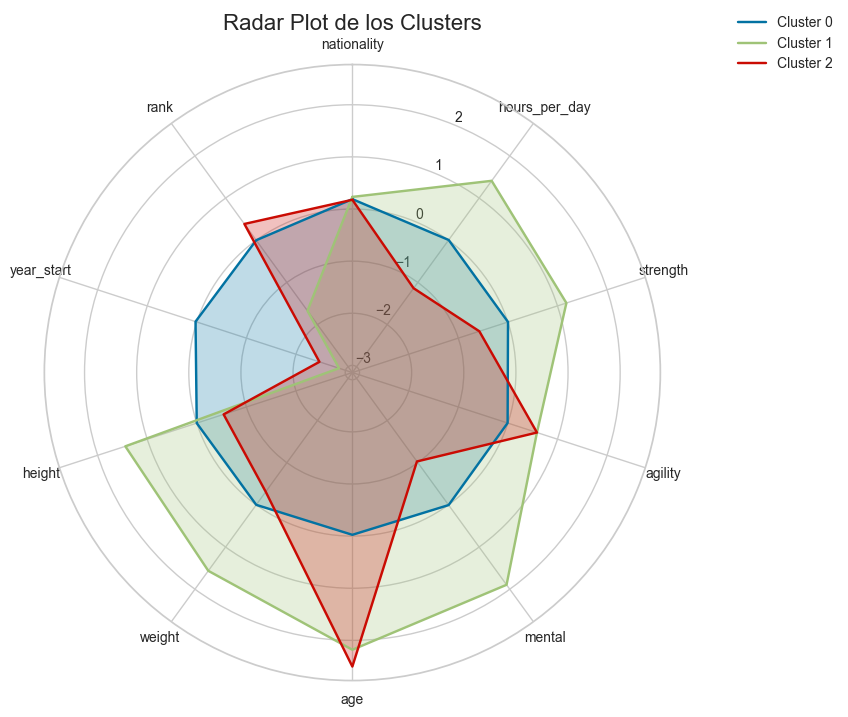

In [ ]:
variables = ['nationality', 'hours_per_day',
       'strength', 'agility', 'mental', 'age',
       'weight', 'height', 'year_start','rank']

modelos.radar_plot(df, variables, "clusters_agglomerative")

In [64]:
gender_distribution = df.groupby("clusters_agglomerative")['agility'].value_counts(normalize=True).unstack()
print(gender_distribution)

agility                 -2.852833  -2.165072  -1.477311  -0.789550  -0.101789  \
clusters_agglomerative                                                          
0                        0.004049   0.030364   0.097166   0.194332   0.277328   
1                             NaN        NaN        NaN        NaN   0.500000   
2                             NaN        NaN        NaN        NaN   0.250000   

agility                  0.585973   1.273734   1.961495  
clusters_agglomerative                                   
0                        0.214575   0.125506    0.05668  
1                        0.500000        NaN        NaN  
2                        0.500000   0.250000        NaN  


In [65]:
strength_distribution = df.groupby("clusters_agglomerative")['strength'].value_counts(normalize=True).unstack()
print(strength_distribution)

strength                -2.651049  -2.012550  -1.374051  -0.735551  -0.097052  \
clusters_agglomerative                                                          
0                        0.006073   0.034413   0.123482    0.17004   0.248988   
1                             NaN        NaN        NaN        NaN        NaN   
2                             NaN        NaN        NaN    0.75000   0.250000   

strength                 0.541447   1.179947   1.818446   2.456945  
clusters_agglomerative                                              
0                        0.206478   0.147773   0.054656   0.008097  
1                        0.500000   0.500000        NaN        NaN  
2                             NaN        NaN        NaN        NaN  


In [66]:
strength_distribution = df.groupby("clusters_agglomerative")['year_start'].value_counts(normalize=True).unstack()
print(strength_distribution)

year_start              -3.343576  -2.868861  -2.552385  -2.394146  -2.235908  \
clusters_agglomerative                                                          
0                             NaN   0.002024   0.004049        NaN   0.002024   
1                             NaN   0.500000        NaN        NaN        NaN   
2                            0.25        NaN   0.250000       0.25        NaN   

year_start              -2.077669  -1.919431  -1.761193  -1.602954  -1.444716  \
clusters_agglomerative                                                          
0                        0.010121   0.008097   0.016194   0.012146   0.016194   
1                             NaN        NaN        NaN        NaN        NaN   
2                             NaN        NaN        NaN   0.250000        NaN   

year_start              -1.286478  -1.128239  -0.970001  -0.811763  -0.653524  \
clusters_agglomerative                                                          
0                         

### Conclusiones y recomendaciones

En cuánto a genero, en el 0 hay hombres y mujeres casi por igual, en el 1 solo hombres y en el 2 solo mujeres.

En edad, los más mayores están el cluster 2, seguidos de los del cluster 1. En el cluster 0 son notablemente más jovenes.

Dado la división por generos, de los clusters, la altura el peso y la fuerza se ordenan de mayor a menor en los clusters 1, 0 y 2 respectivamente.

La agilidad está muy igualada en los clusters 1 y 2 mientras que es notablemente inferior en el cluster 0.

La mentalidad es más fuerte en le cluster 1, seguido del 2 y del 0.

La edad y los años de experiencia van de la mano, y dan las cifras mauyores en el claster 1, seguido de cerca por el 2 y por ultimo el 0.

Los deportistas mejor rankeados están en el cluster 1, seguidos de los del 0 y por ultimo los del 2.



De los gorupby que hemos sacado, se desprende que mientras los clusters 1 y 2 son compactos, agrupando a deportistas de caracteristicas similares, y antagónicas, los del 1 al 2, el 0 es una especie de cajón de sastre, donde hay individuos de características bastante diferentes.

Como consecuencia, para los clusters 1 y 2 se podrían hacer prácticamente las mismas recomendaiones que se hicieron para el kmeans, en cambio, el 0 no es un cluster muy adecuado para entrenamiento de elite en deportes de contacto, pues no hay características uniformes. En todo caso se podría hacer un entrenamiento en común ene se grupo, de cardio y ciertas técnicas de poco riesgo, pero para el resto, y especilamente el sparring, claramente habría que hacer subgrupos con planes específicos para cada uno.

## Dbscan

In [67]:
df_copia

gender       age    height  nationality    weight  sports  hours_per_day  \
0      0.53  1.812234 -1.042800        0.052 -0.694439   0.062      -0.046579   
1      0.47  0.891945  1.071555        0.232  0.931459   0.058      -2.229969   
2      0.47 -0.396461  0.384390        0.232  0.299165   0.084       0.681218   
3      0.47  1.444118  1.335850        0.232  1.563753   0.058      -0.046579   
4      0.53 -0.396461 -1.782824        0.230 -1.597716   0.068      -1.502172   
..      ...       ...       ...          ...       ...     ...            ...   
495    0.47  0.523829  1.124414        0.236  1.292770   0.058      -0.774376   
496    0.53 -0.028345 -1.412812        0.236 -1.688044   0.010       1.409014   
497    0.47 -1.684866  1.441567        0.236  1.112115   0.040      -0.046579   
498    0.53  0.155713  0.225813        0.236  0.208838   0.058      -0.774376   
499    0.53 -1.868924 -0.461352        0.236 -0.423456   0.014       0.681218   

     strength   agility    mental  federation  year_start      rank  \
0    0.541447  0.585973  0.223943       0.412   -2.868861 -1.444533   
1    1.179947 -1.477311  1.895156       0.204   -0.178809 -0.620075   
2    1.179947  0.585973  0.223943       0.204    0.770621 -0.675501   
3    0.541447 -0.789550  1.059549       0.412   -0.653524  0.010392   
4   -0.735551 -0.101789  0.223943       0.384    0.770621  0.758640   
..        ...       ...       ...         ...         ...       ...   
495  1.818446 -0.789550 -1.447270       0.384    0.137667  0.710142   
496 -1.374051  1.273734 -0.611664       0.204   -0.653524 -1.222830   
497  1.179947  0.585973  0.223943       0.384    2.194766  0.100459   
498 -0.735551 -1.477311 -1.447270       0.384    0.770621  1.721662   
499 -0.097052  1.961495 -1.447270       0.384    0.612382 -1.098122   

    clusters_agglomerative  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
..                     ...  
495                      0  
496                      0  
497                      0  
498                      0  
499                      0  

[500 rows x 14 columns]

In [79]:
df_dbscan = modelos.modelo_dbscan(df, eps_values=[1.5, 2, 2.5, 3, 5, 7], min_samples_values=[5, 10, 15, 20, 25])
df_dbscan

eps: 1.5, min_samples: 5, silhouette: -0.1692216202412302
eps: 1.5, min_samples: 10, silhouette: -0.2149535254920913
eps: 1.5, min_samples: 15, silhouette: -0.031013076048540485
eps: 1.5, min_samples: 20, silhouette: -1
eps: 1.5, min_samples: 25, silhouette: -1
eps: 2, min_samples: 5, silhouette: 0.22817931325855598
eps: 2, min_samples: 10, silhouette: 0.21634819128686178
eps: 2, min_samples: 15, silhouette: 0.18610697532652062
eps: 2, min_samples: 20, silhouette: 0.14920354303749775
eps: 2, min_samples: 25, silhouette: 0.11614414173697128
eps: 2.5, min_samples: 5, silhouette: 0.28209752276605876
eps: 2.5, min_samples: 10, silhouette: 0.28209752276605876
eps: 2.5, min_samples: 15, silhouette: 0.28209752276605876
eps: 2.5, min_samples: 20, silhouette: 0.28209752276605876
eps: 2.5, min_samples: 25, silhouette: 0.28209752276605876
eps: 3, min_samples: 5, silhouette: 0.34784238581932264
eps: 3, min_samples: 10, silhouette: 0.34784238581932264
eps: 3, min_samples: 15, silhouette: 0.32237568

gender       age    height  nationality    weight  sports  hours_per_day  \
0      0.53  1.812234 -1.042800        0.052 -0.694439   0.062      -0.046579   
1      0.47  0.891945  1.071555        0.232  0.931459   0.058      -2.229969   
2      0.47 -0.396461  0.384390        0.232  0.299165   0.084       0.681218   
3      0.47  1.444118  1.335850        0.232  1.563753   0.058      -0.046579   
4      0.53 -0.396461 -1.782824        0.230 -1.597716   0.068      -1.502172   
..      ...       ...       ...          ...       ...     ...            ...   
495    0.47  0.523829  1.124414        0.236  1.292770   0.058      -0.774376   
496    0.53 -0.028345 -1.412812        0.236 -1.688044   0.010       1.409014   
497    0.47 -1.684866  1.441567        0.236  1.112115   0.040      -0.046579   
498    0.53  0.155713  0.225813        0.236  0.208838   0.058      -0.774376   
499    0.53 -1.868924 -0.461352        0.236 -0.423456   0.014       0.681218   

     strength   agility    mental  federation  year_start      rank  \
0    0.541447  0.585973  0.223943       0.412   -2.868861 -1.444533   
1    1.179947 -1.477311  1.895156       0.204   -0.178809 -0.620075   
2    1.179947  0.585973  0.223943       0.204    0.770621 -0.675501   
3    0.541447 -0.789550  1.059549       0.412   -0.653524  0.010392   
4   -0.735551 -0.101789  0.223943       0.384    0.770621  0.758640   
..        ...       ...       ...         ...         ...       ...   
495  1.818446 -0.789550 -1.447270       0.384    0.137667  0.710142   
496 -1.374051  1.273734 -0.611664       0.204   -0.653524 -1.222830   
497  1.179947  0.585973  0.223943       0.384    2.194766  0.100459   
498 -0.735551 -1.477311 -1.447270       0.384    0.770621  1.721662   
499 -0.097052  1.961495 -1.447270       0.384    0.612382 -1.098122   

     clusters_agglomerative  clusters_dbscan  
0                         0                0  
1                         0                0  
2                         0                0  
3                         0                0  
4                         0                0  
..                      ...              ...  
495                       0                0  
496                       0                0  
497                       0                0  
498                       0                0  
499                       0                0  

[500 rows x 15 columns]

In [72]:
df_dbscan[['clusters_agglomerative', 'clusters_dbscan']] = df_dbscan[['clusters_agglomerative',
       'clusters_dbscan']].astype('int')

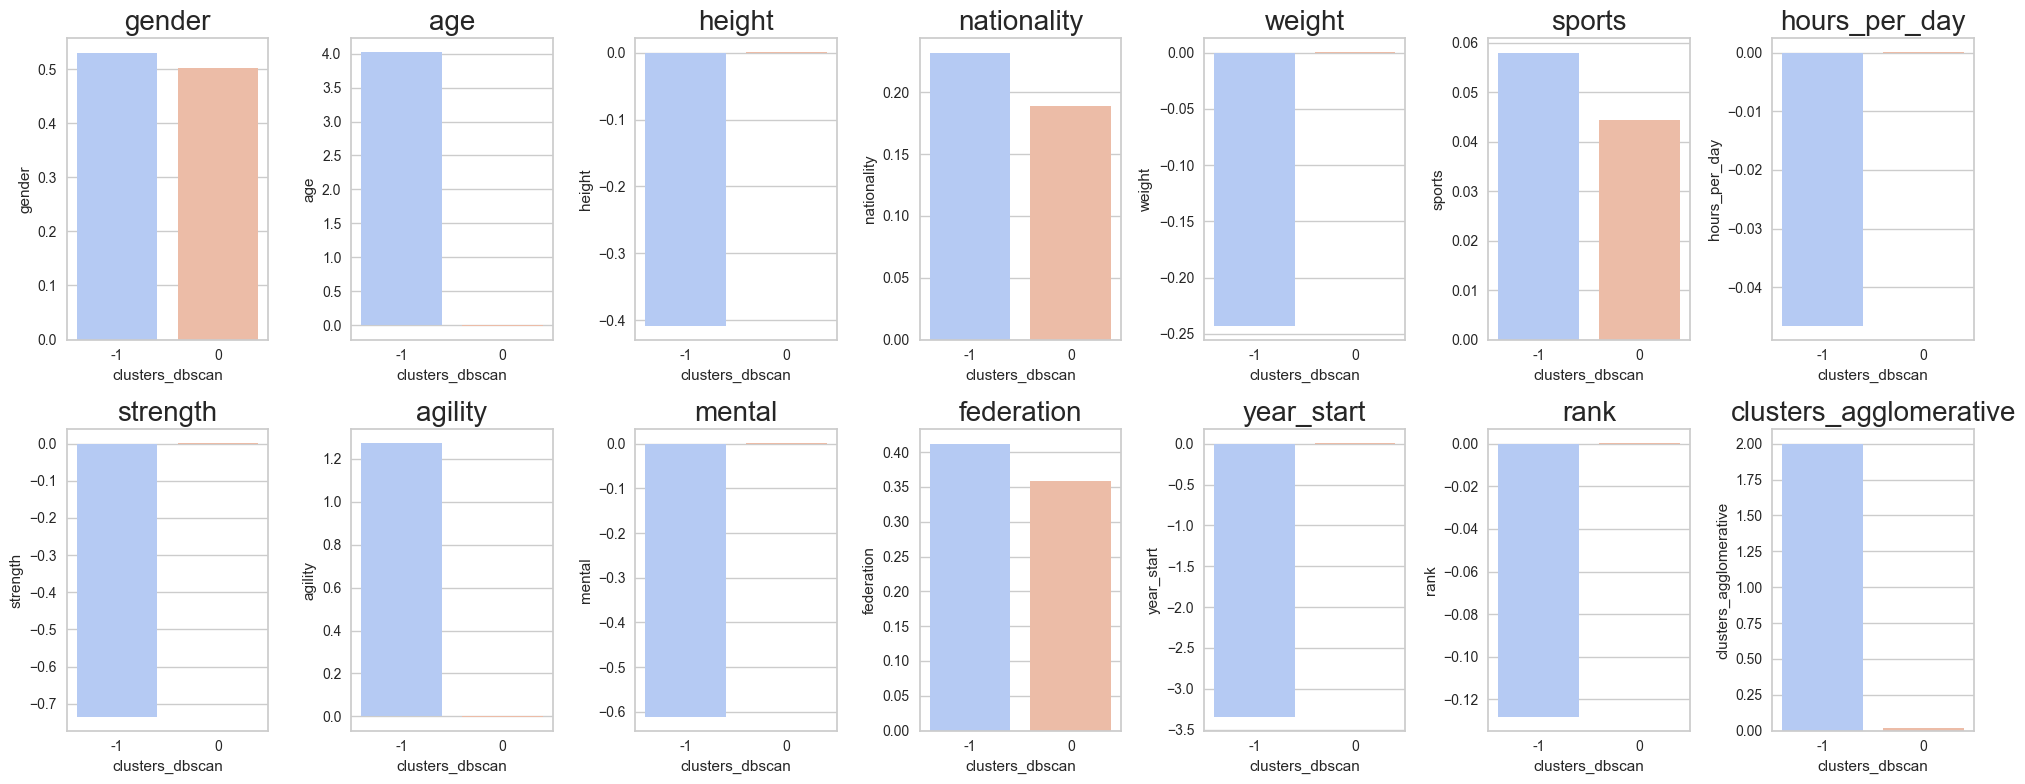

In [80]:
columnas_plot = df.columns.drop("clusters_dbscan")

# Crear subplots
fig, axes = plt.subplots(nrows=2, ncols=math.ceil(len(columnas_plot) / 2), figsize=(20, 8))
axes = axes.flat

for indice, columna in enumerate(columnas_plot):
    df_group = df.groupby("clusters_dbscan")[columna].mean().reset_index()
    sns.barplot(x="clusters_dbscan", y=columna, data=df_group, ax=axes[indice], palette="coolwarm")
    axes[indice].set_title(columna, fontsize=20)

plt.tight_layout()

# Eliminar ejes vacíos si existen
if len(columnas_plot) % 2 != 0:
    fig.delaxes(axes[-1])

plt.show()


In [81]:
df_filtrado = df[df['clusters_dbscan'] == -1]
df_filtrado

gender       age    height  nationality    weight  sports  hours_per_day  \
324    0.53  4.020929 -0.408493        0.232 -0.242801   0.058      -0.046579   

     strength   agility    mental  federation  year_start      rank  \
324 -0.735551  1.273734 -0.611664       0.412   -3.343576 -0.128172   

     clusters_agglomerative  clusters_dbscan  
324                       2               -1

Vemos que los clusters que nos crea son muy malos, pues uno de ellos solo tiene un elemento. Por tanto no tiene sentido sacar conclusiones de un modelo así

De los otros dos modelos que hemos sacado, creo que el que proporciona unos clusters másadecuados para hacer un entrenamiento de deportes de contacto son los que nos da kmeans, pues los atletas están agrupados por características físicas, de mentalidad y dediación similares. No hay ningun cluster tan heterogeneo como el cluster 0 del método Aglomerativo.

Las métricas no son buenas y habría que tratar de mejorarlas (sería un next step) pero hay que tener en cuenta que esas metricas empeoran por columnas como nationality, federationy sport en las que realmente no nos importa que haya poca compacidad y haya solapamiento entre clusters, pues no tienen por qué definir el plan de entrenamiento.